## Data Overview ##

This dataset is obtained from Kaggle - https://www.kaggle.com/datasets/mdriponmiah/heartdiseasedataset

### Dataset Information ###

- age : Age of persons
- sex : Gender of persons
- cp : Chest pain type (4 values)
- trtbps : Resting blood pressure
- chol : Serum cholestrol in mg/dl
- fbs : Fasting blood sugar > 120 mg/dl
- restecg : Resting electrocardio results(values 0,1,2)
- thalach : Maximum heart rate achieved
- exng : Exercise induced angina
- oldpeak : ST depression induced by exercise relative to rest
- slp : The slope of the peak exercise ST segment
- caa : Number of major vessels(0-3) colored by flourosopy
- thall : 0=normal, 1=fixed defect, 2 = reversable defect
- output : Target column, 1 = Diseased, 0 = Not Diseased

***Importing Libraries***

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Import Dataset and EDA***

In [116]:
# Load the dataset
df = pd.read_csv('../data/heart_disease_dataset.csv')

# Get the info about the dataframe
df.info()

# Get few rows of the dataframe
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [117]:
# Drop Null Value
new_df = df.dropna()

In [118]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [119]:
new_df.shape

(303, 14)

**Data has no null values. Its has 303 entries and 14 columns which is same as original dataframe**

In [120]:
new_df.describe(include='all')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Deep dive into data, understand the data distribution and relationships 

In [121]:
numerical_features = ['age', 'sex', 'cp', 'trtbps', 'chol', 
                      'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall' ]

In [124]:
no_heart_disease  = (138/303) * 100
heart_disease =  (165/303) * 100

print('Heart Disease present are {} percent of total people\'s of datasets'.format(heart_disease))
print('No HeartDisease are {} percent of total people\'s of datasets'.format(no_heart_disease))

Heart Disease present are 54.45544554455446 percent of total people's of datasets
No HeartDisease are 45.54455445544555 percent of total people's of datasets


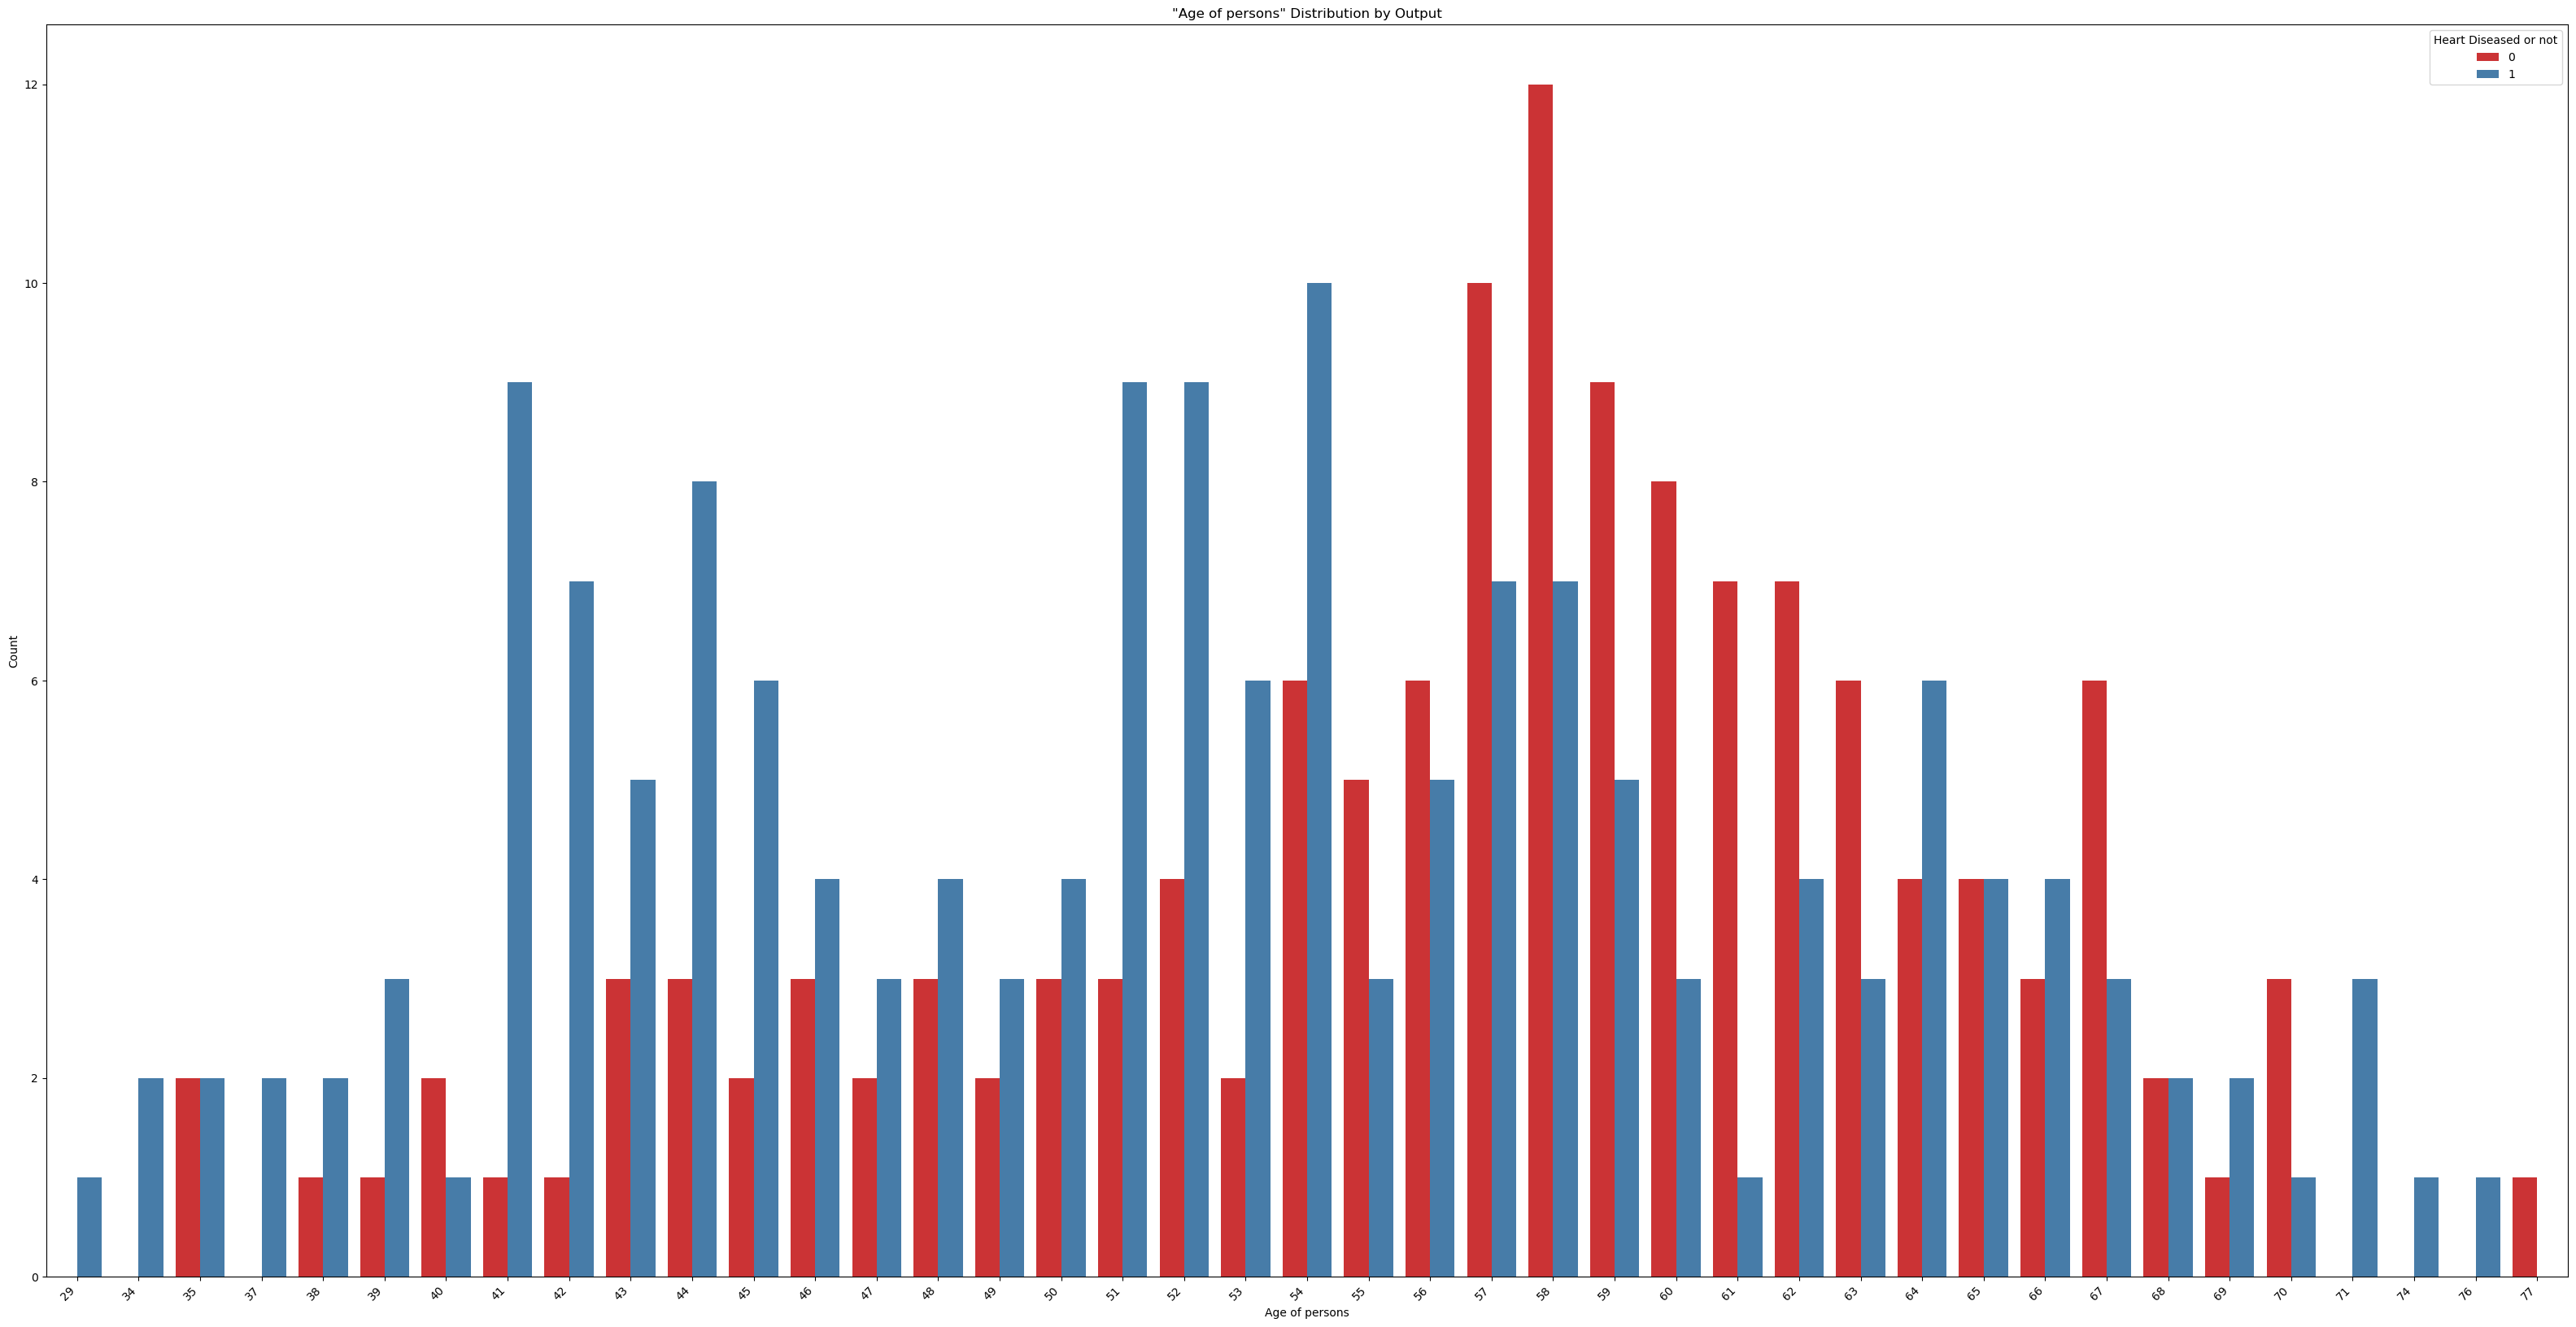

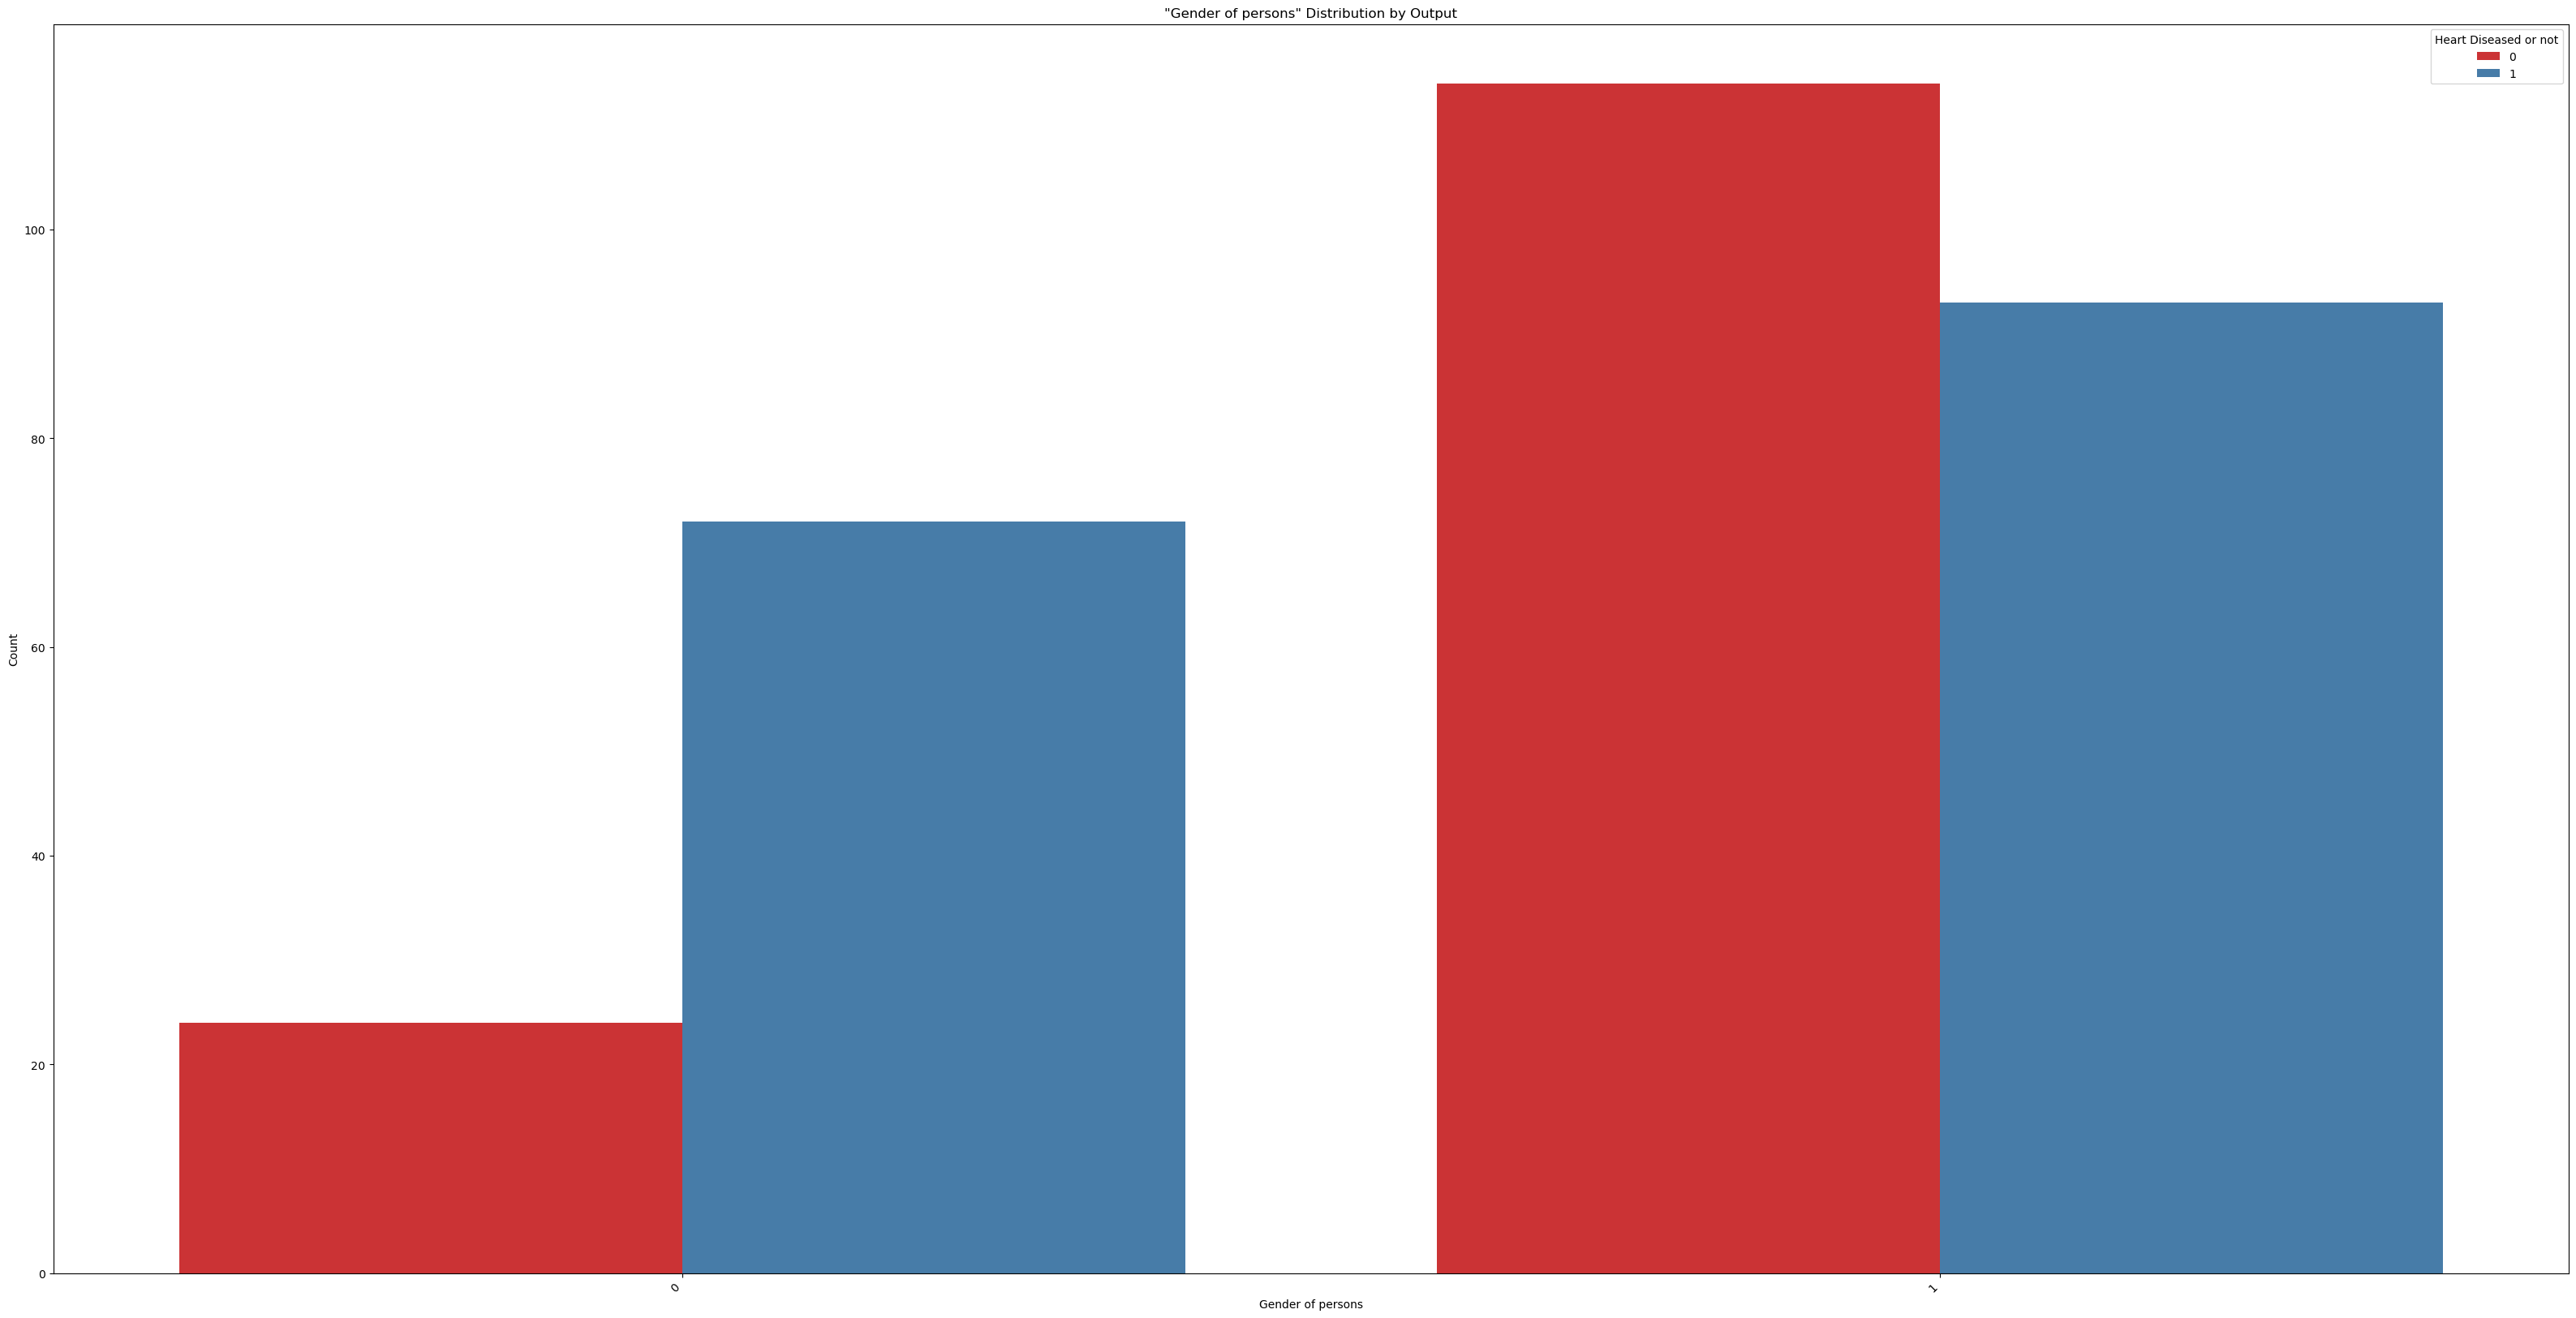

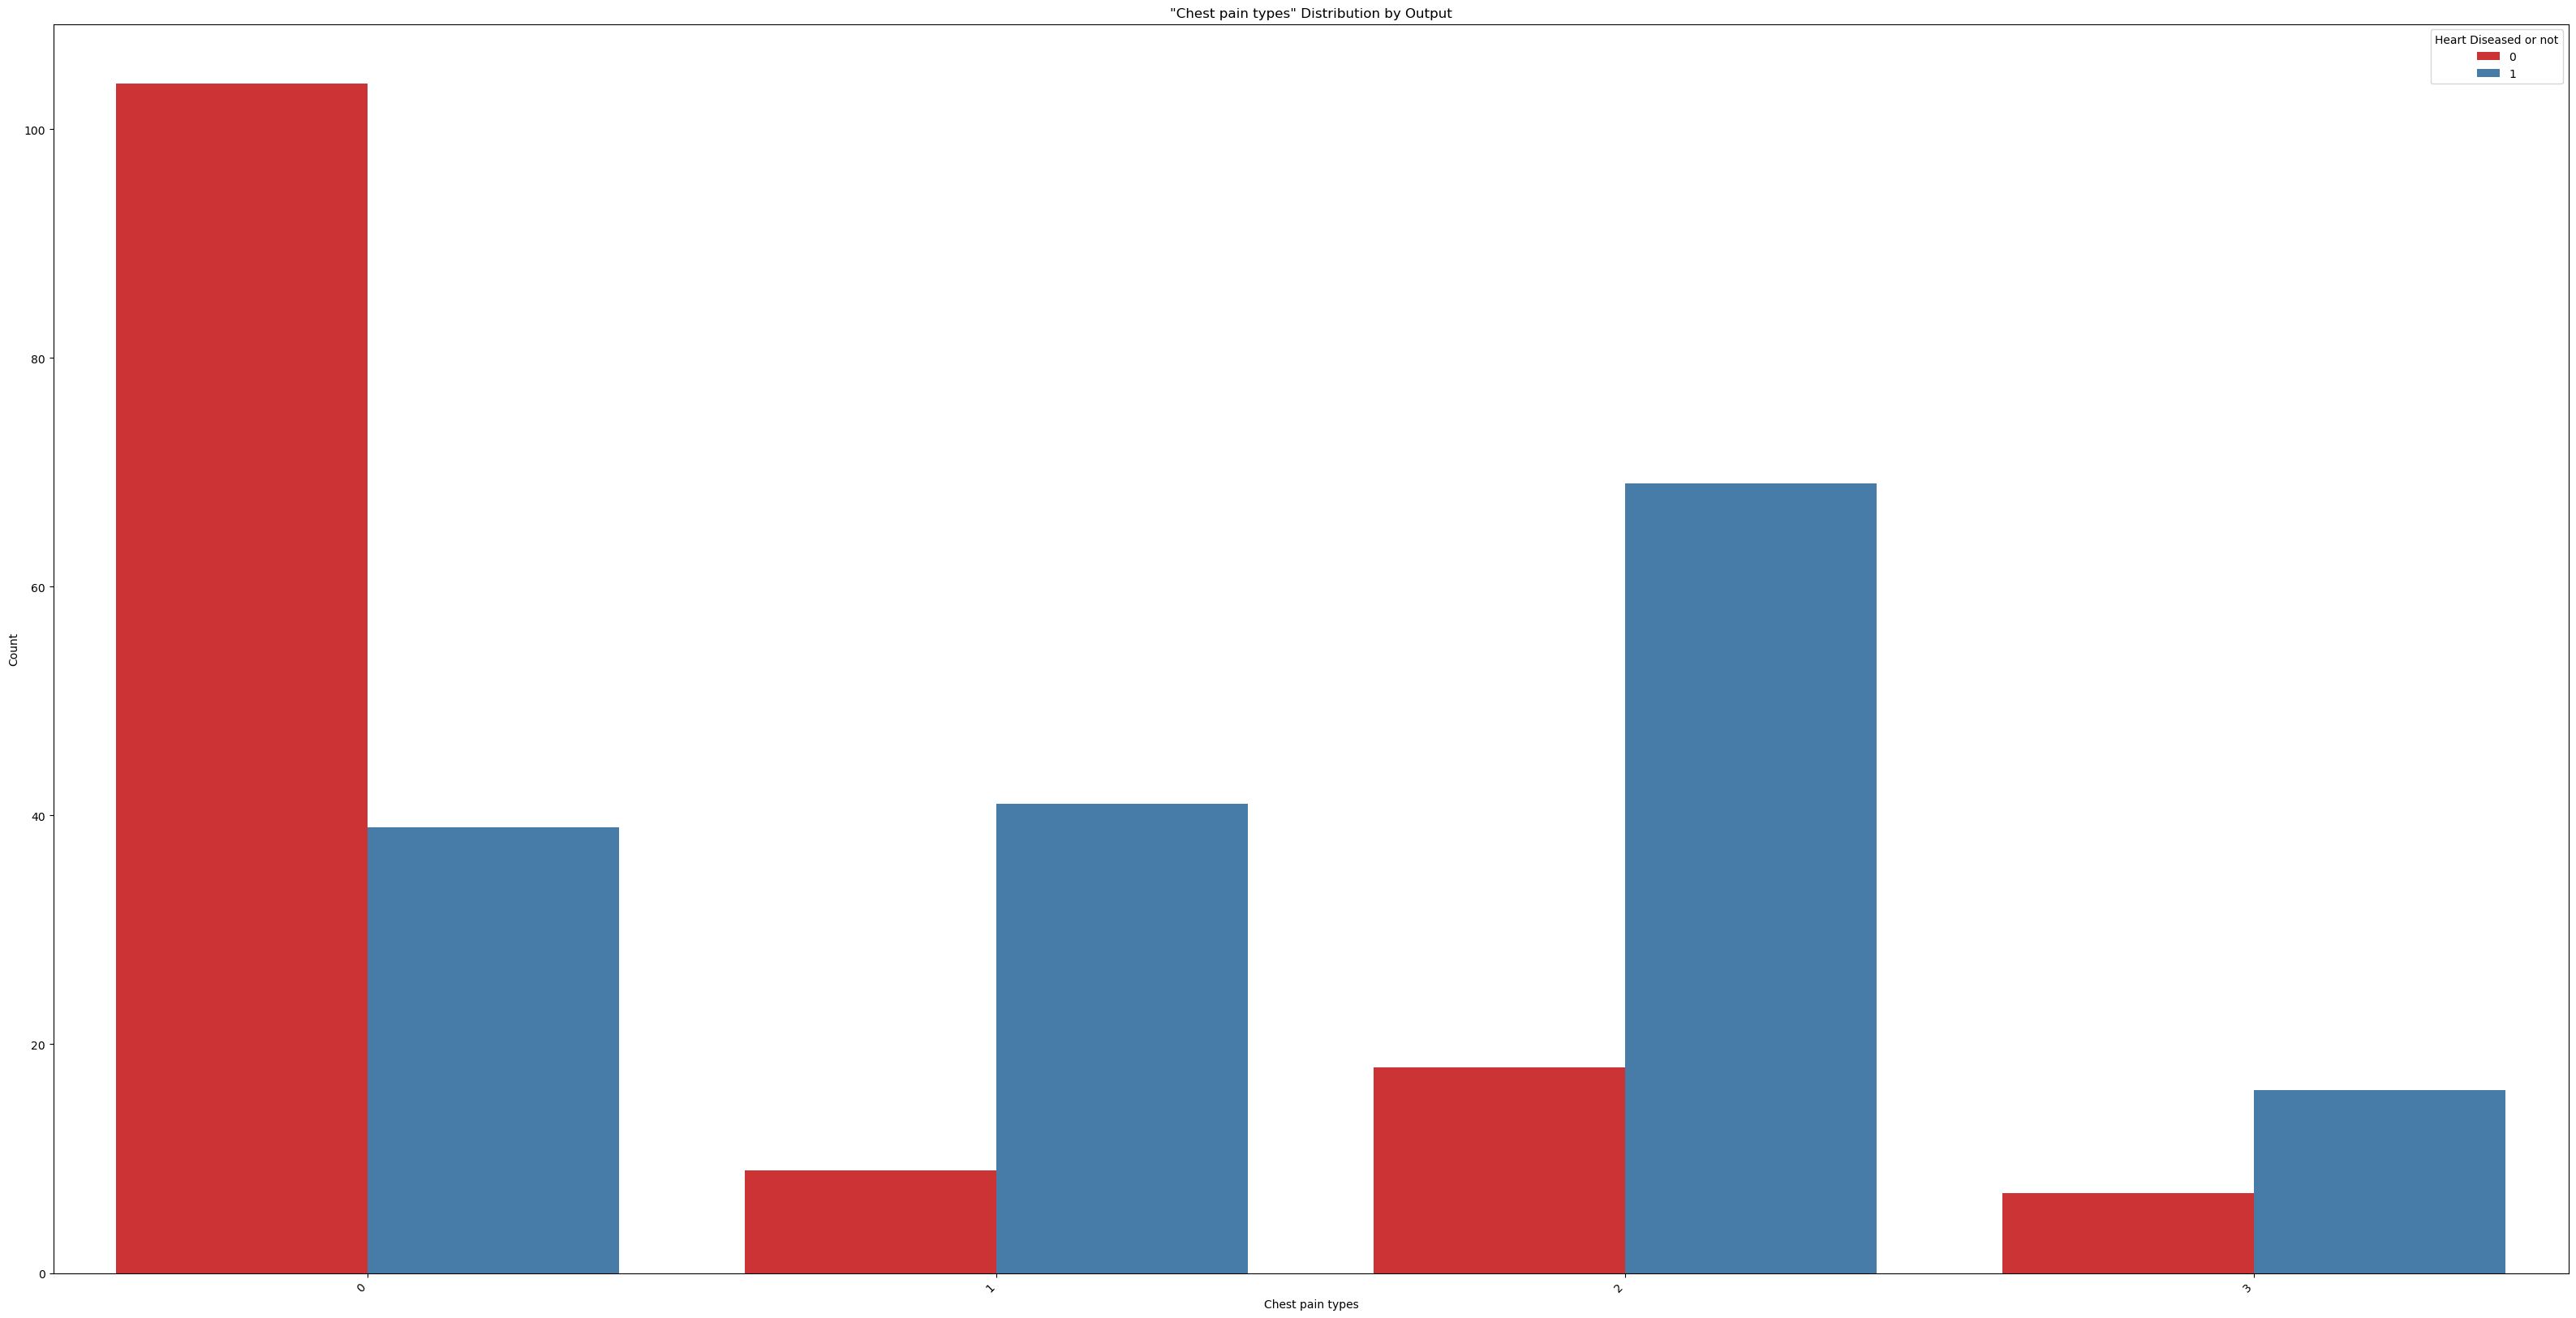

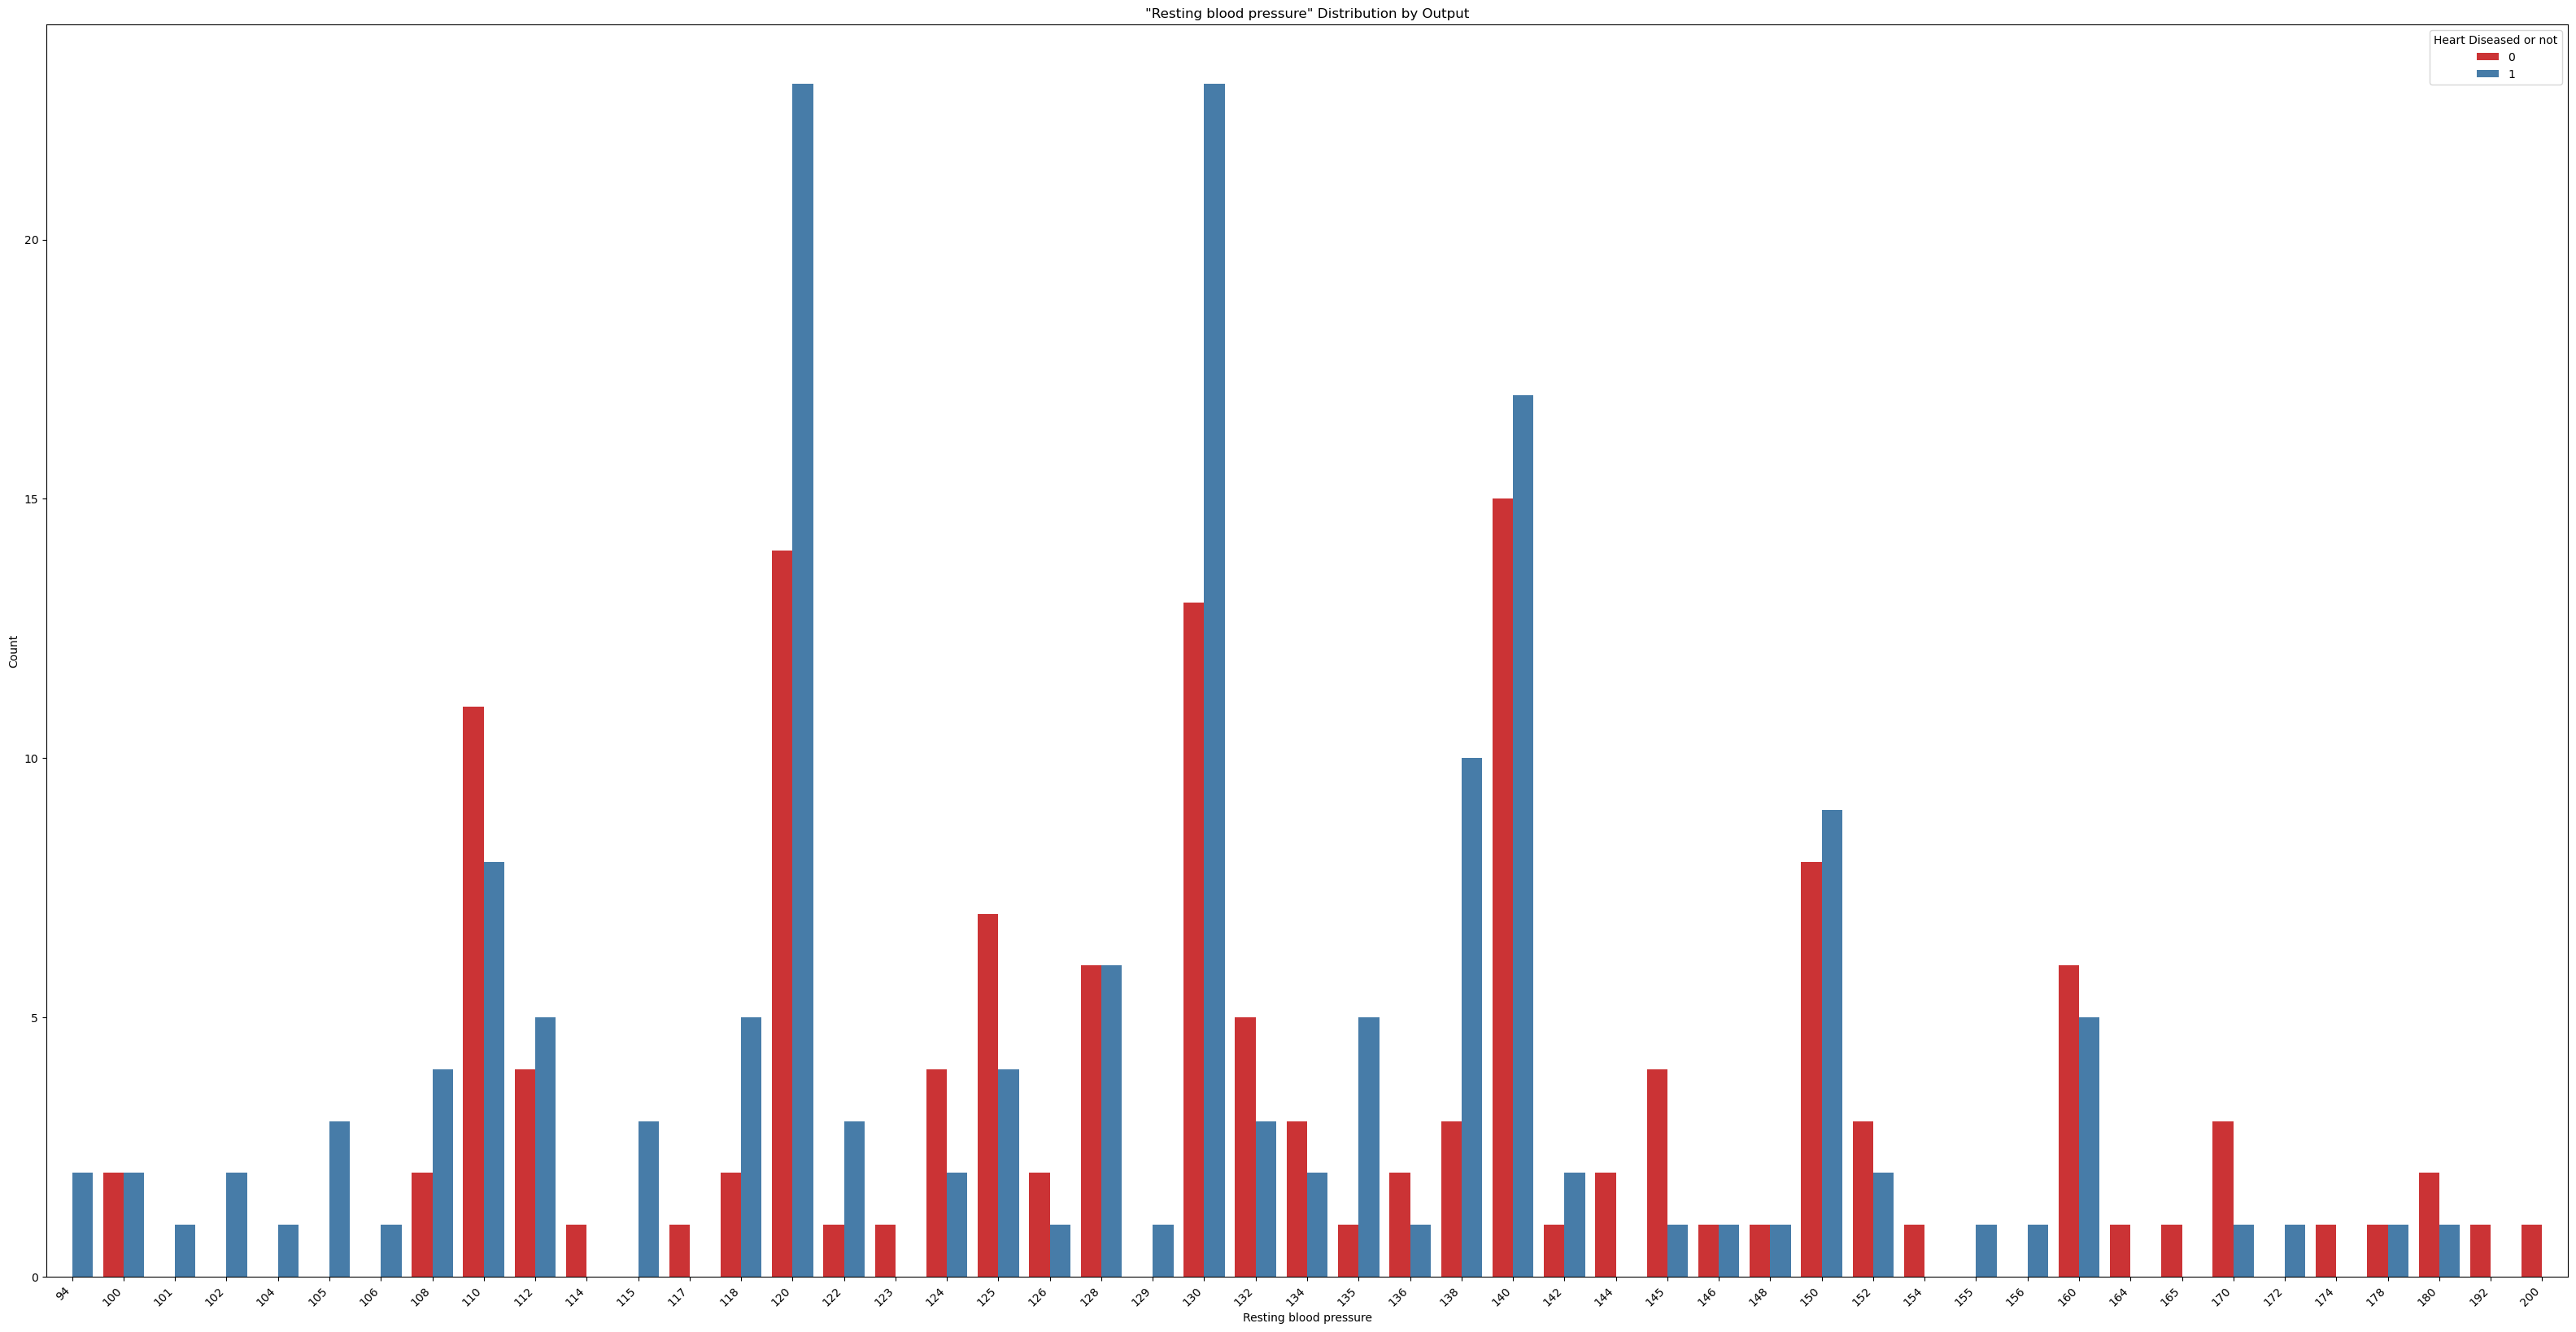

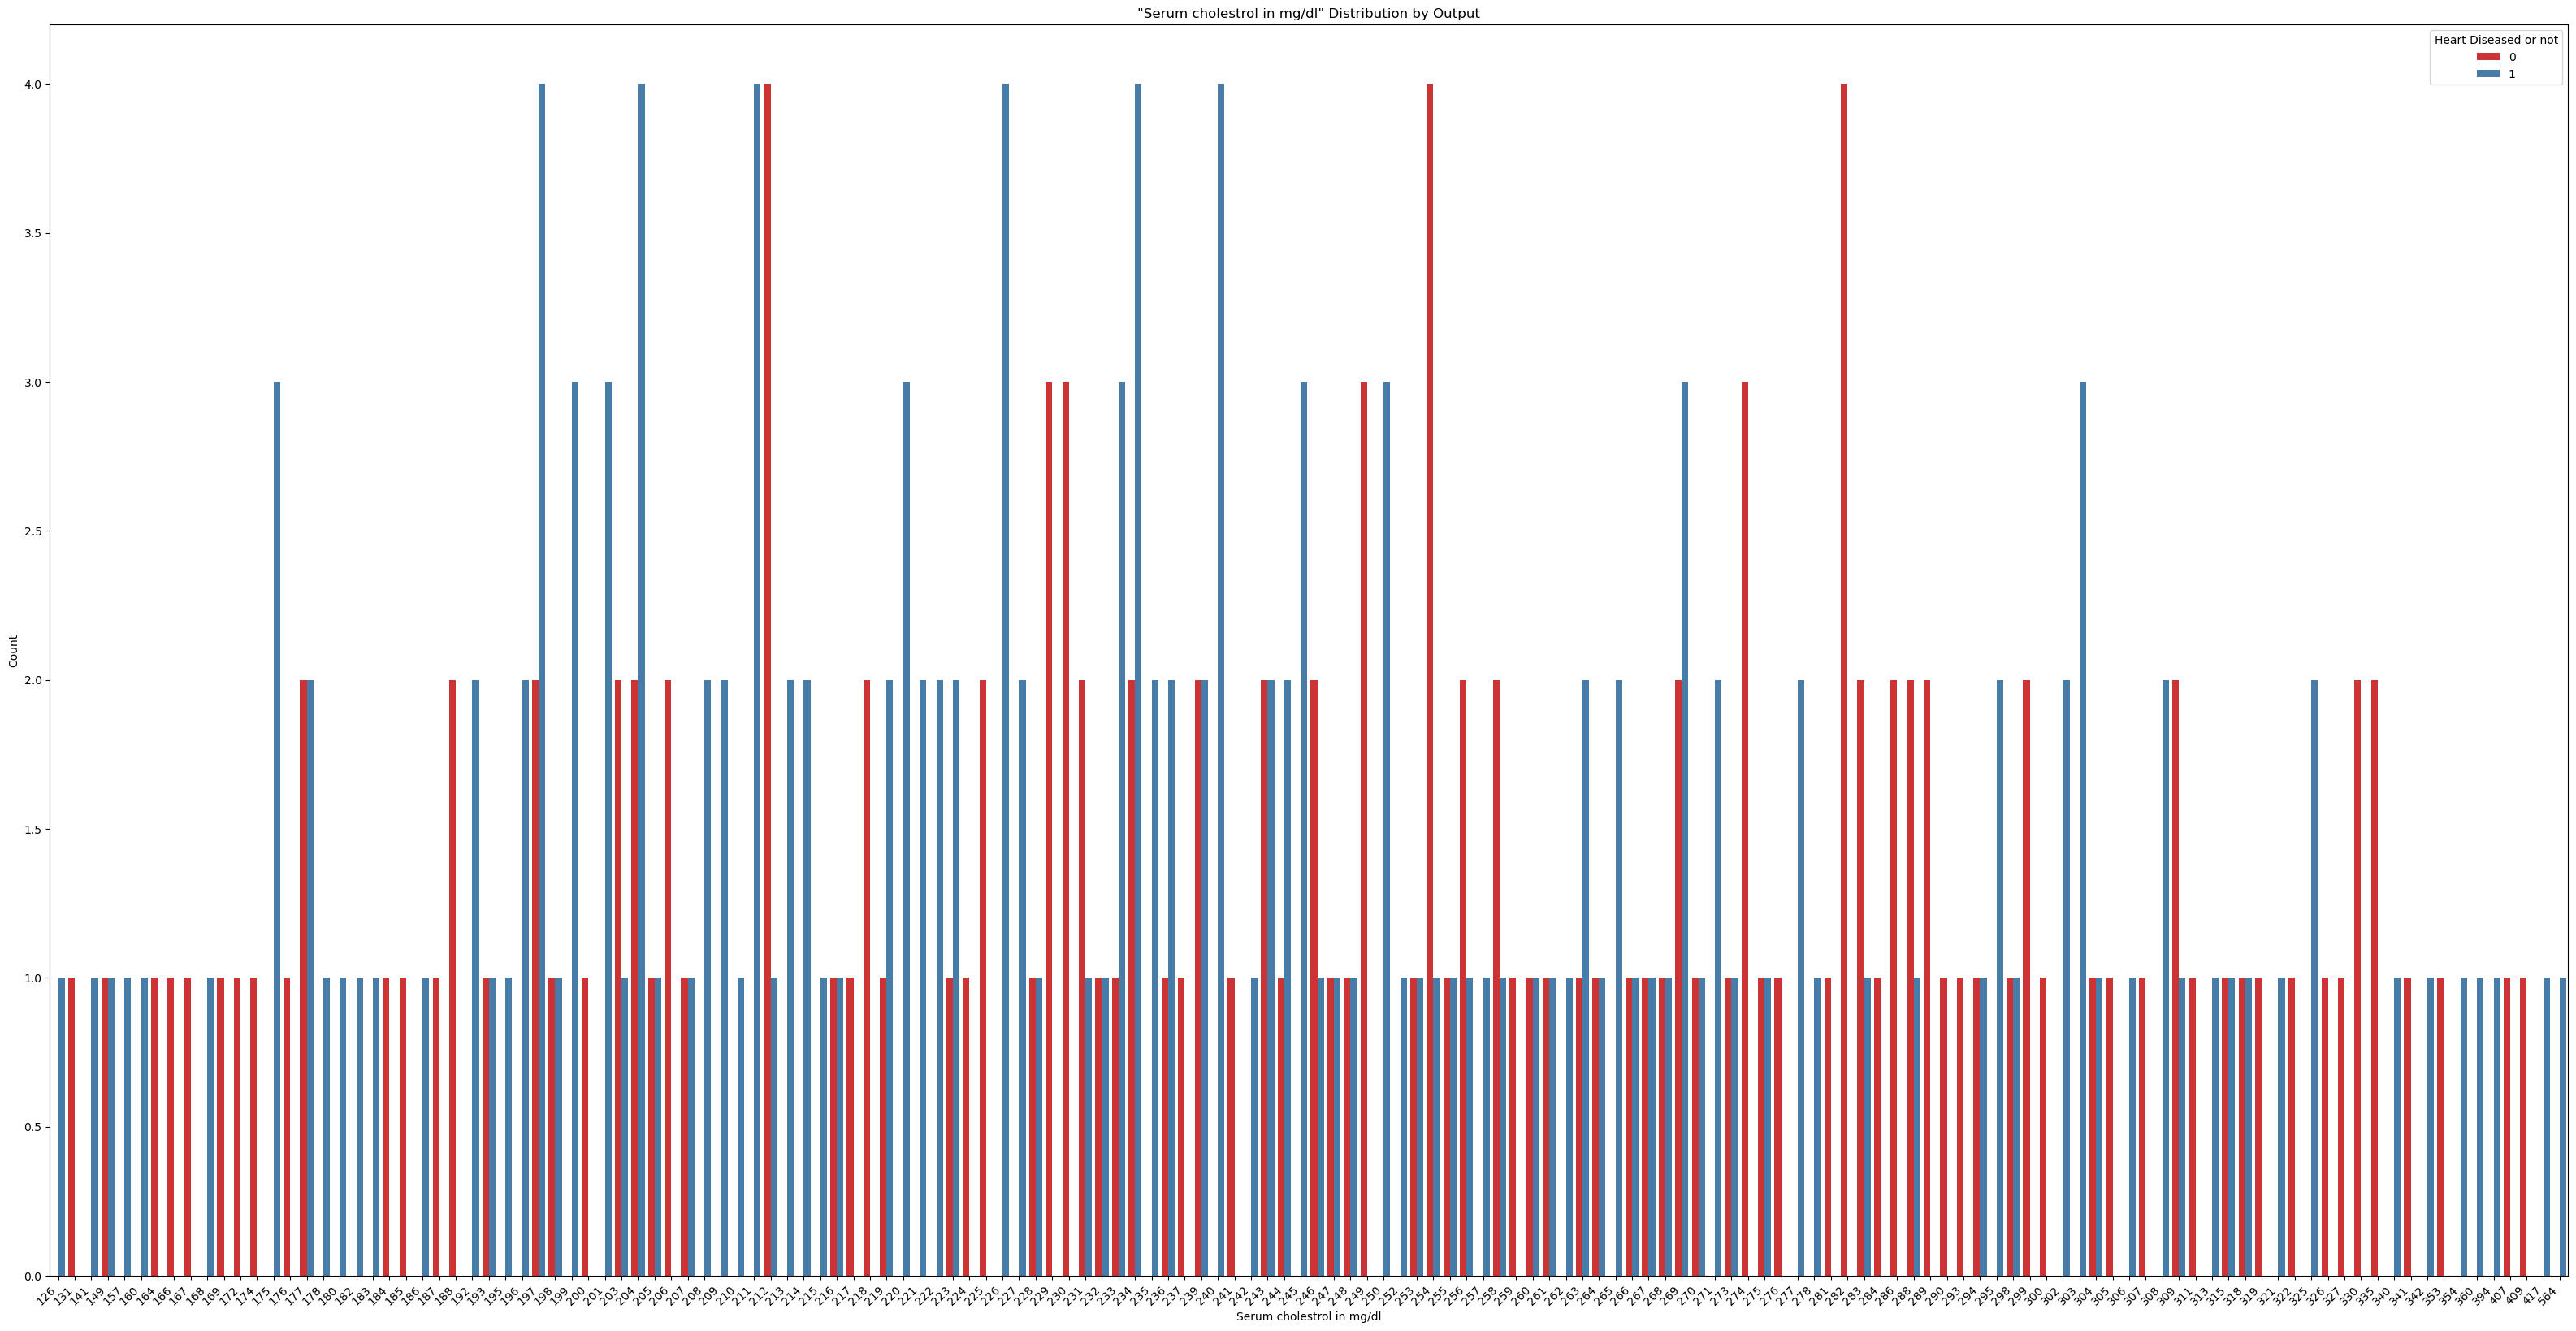

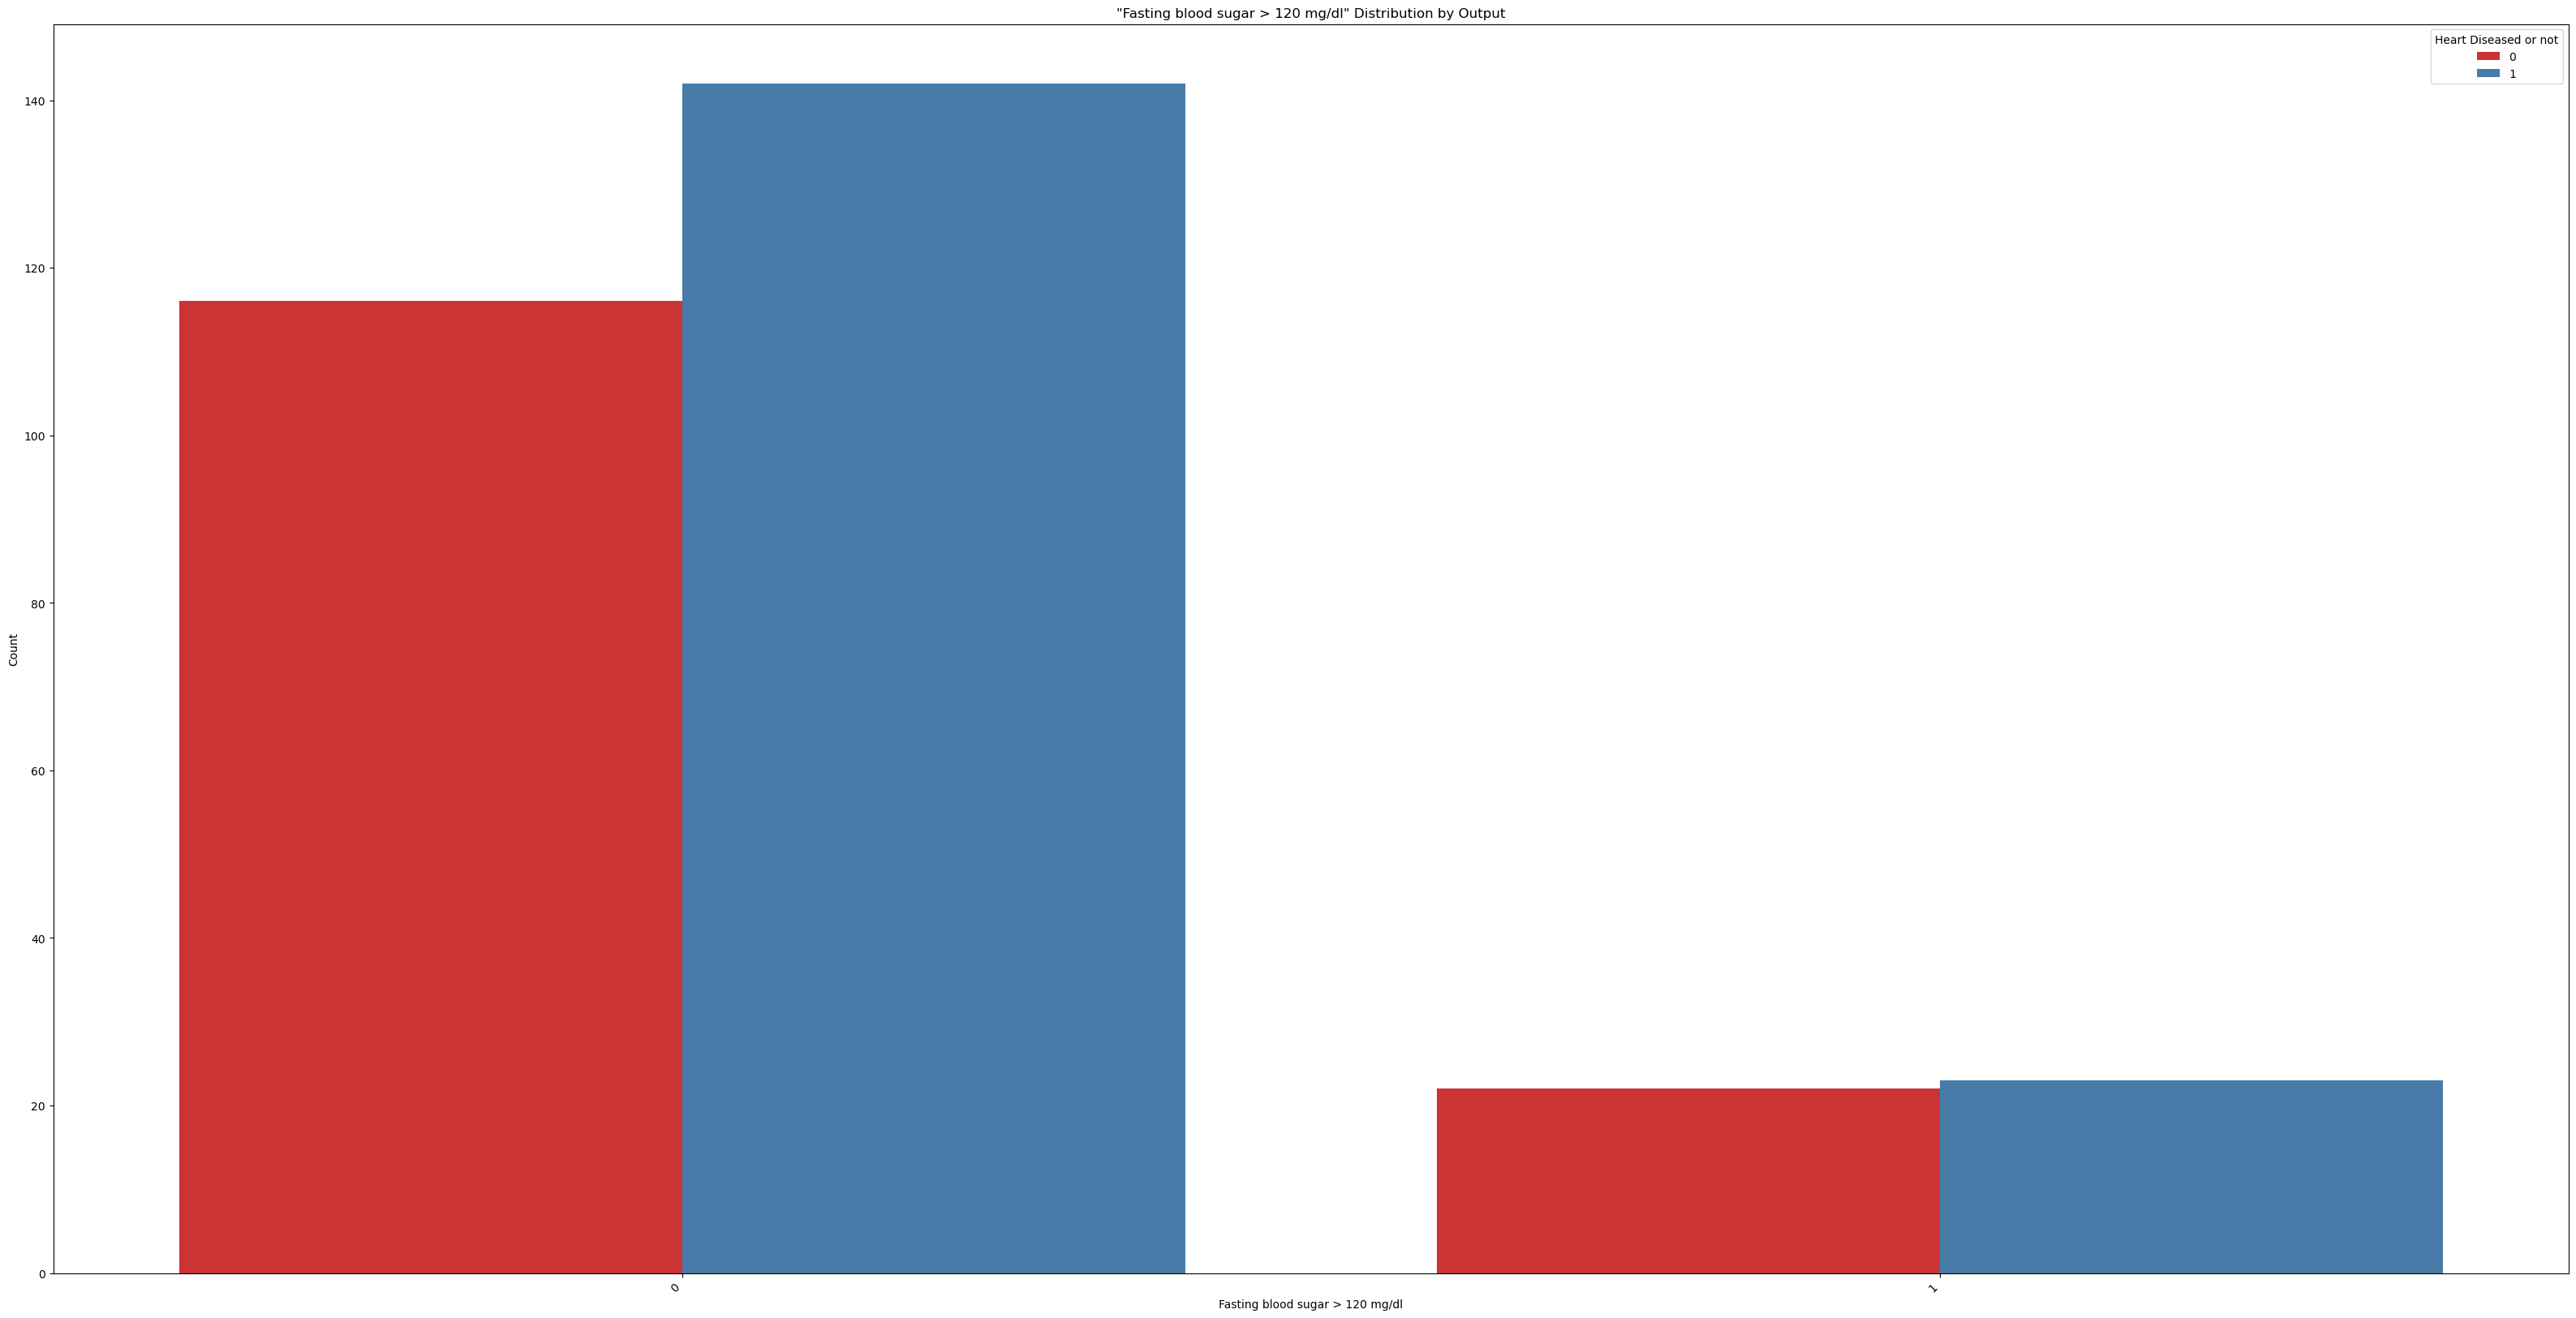

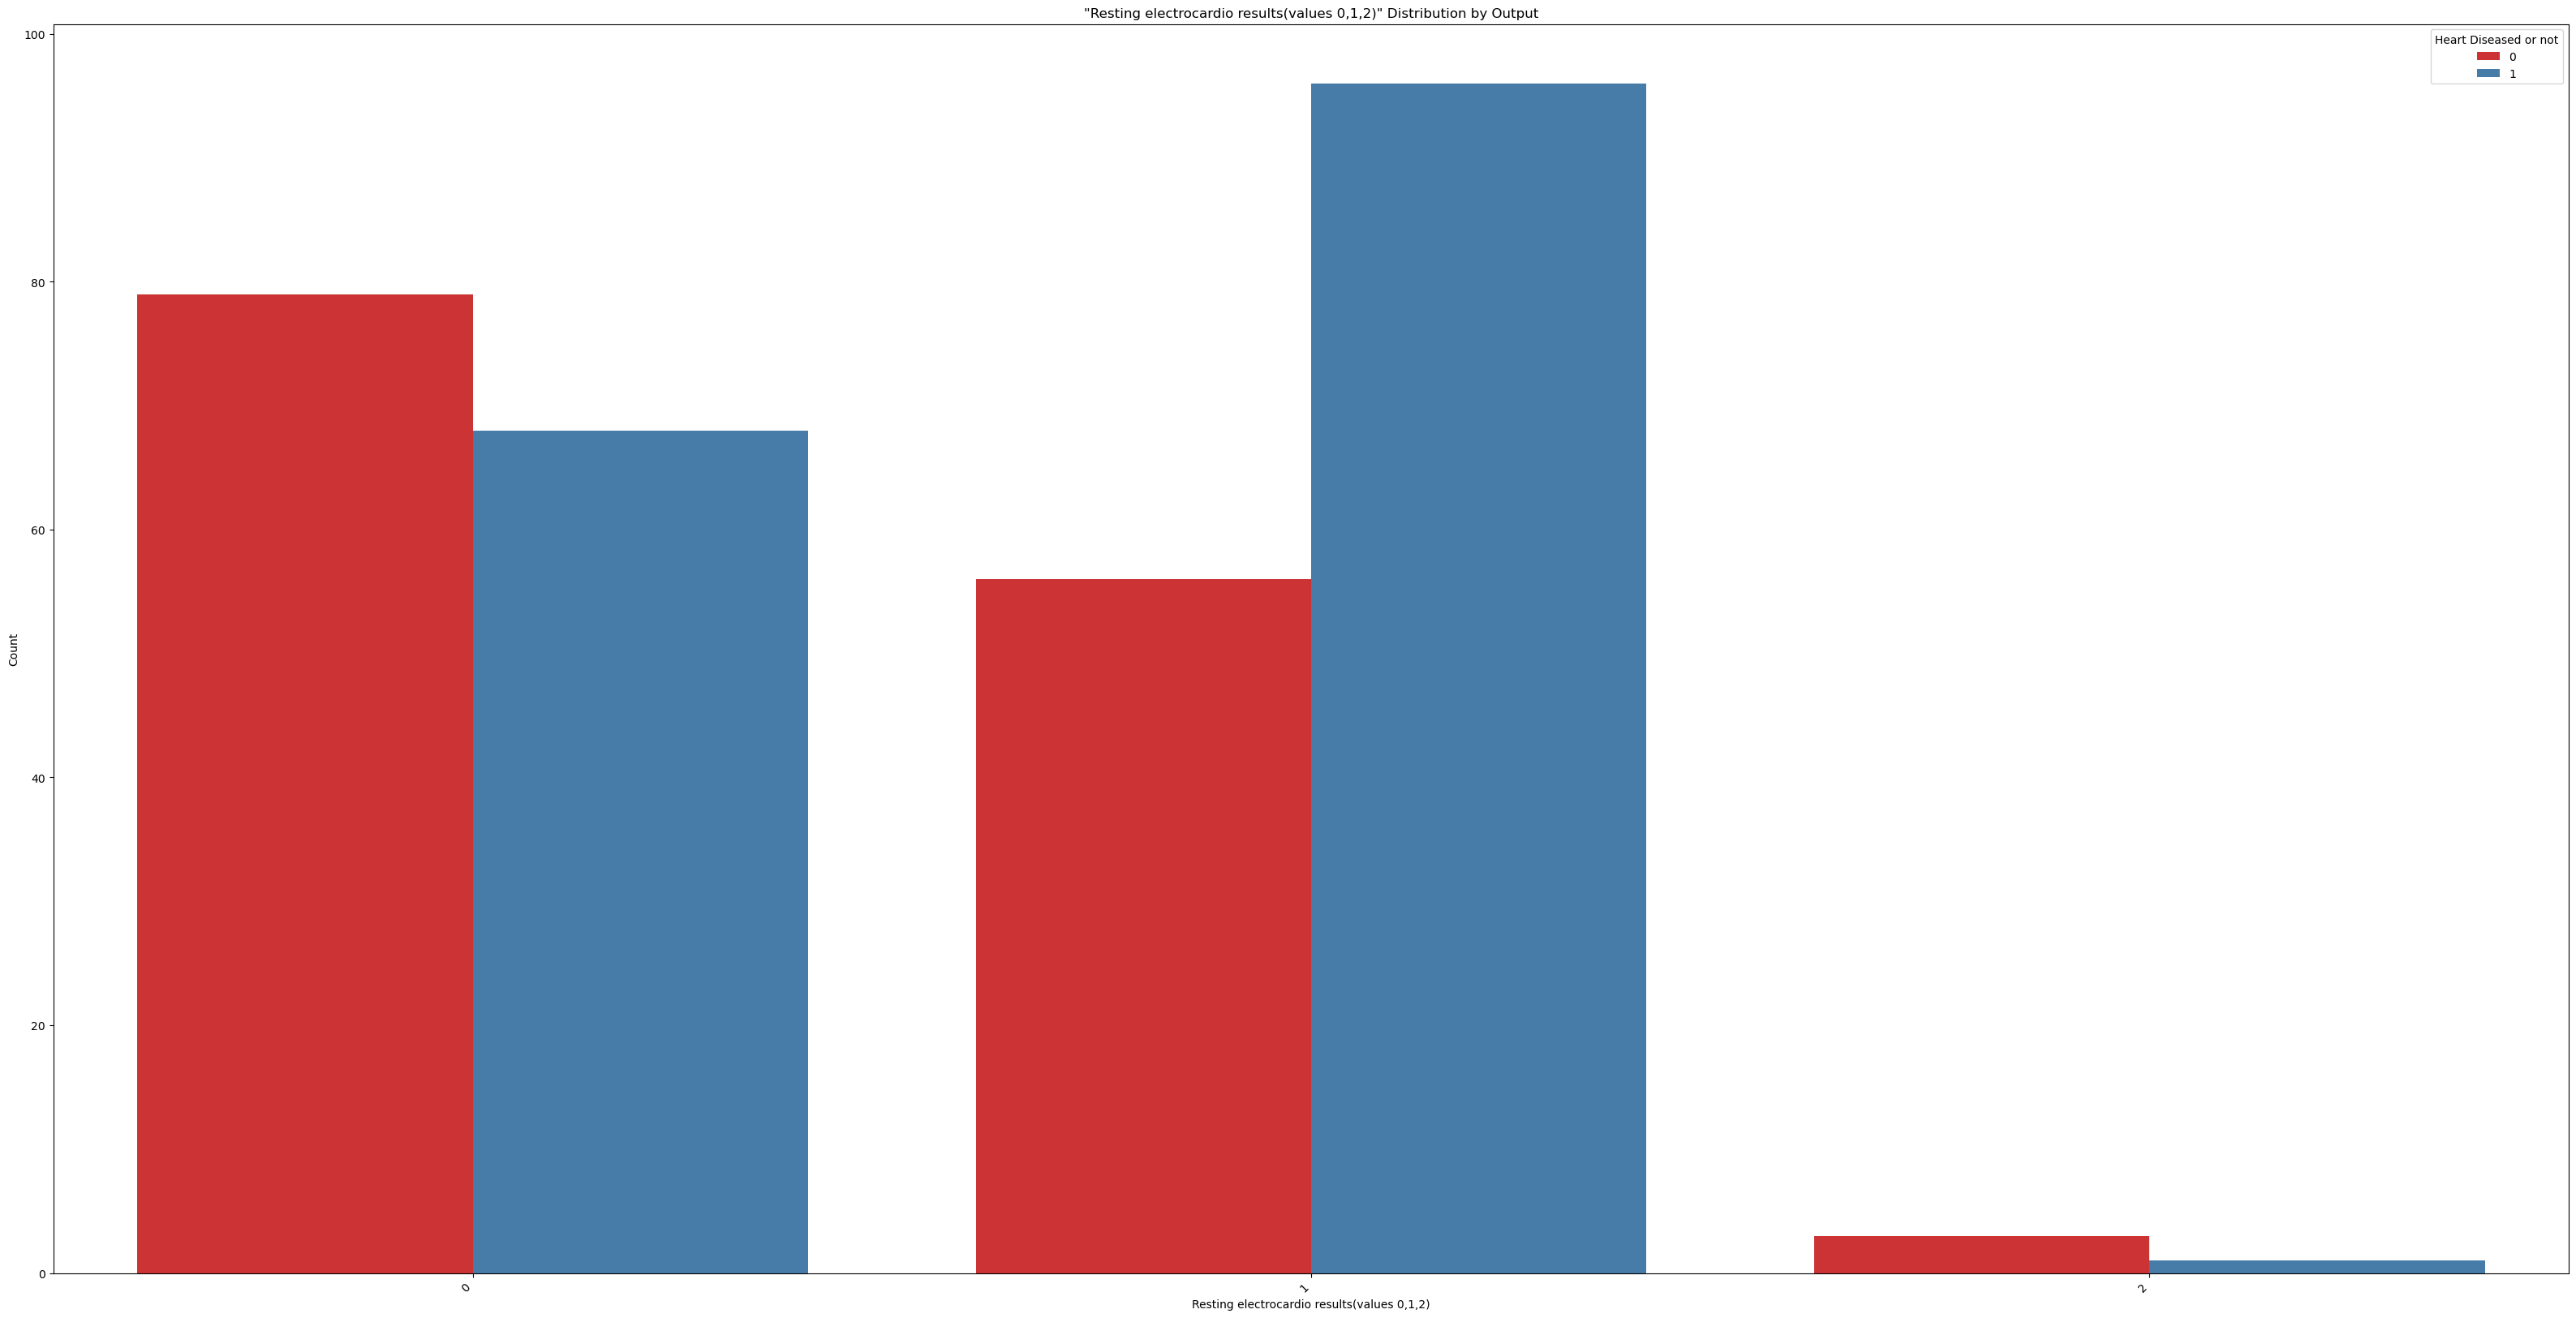

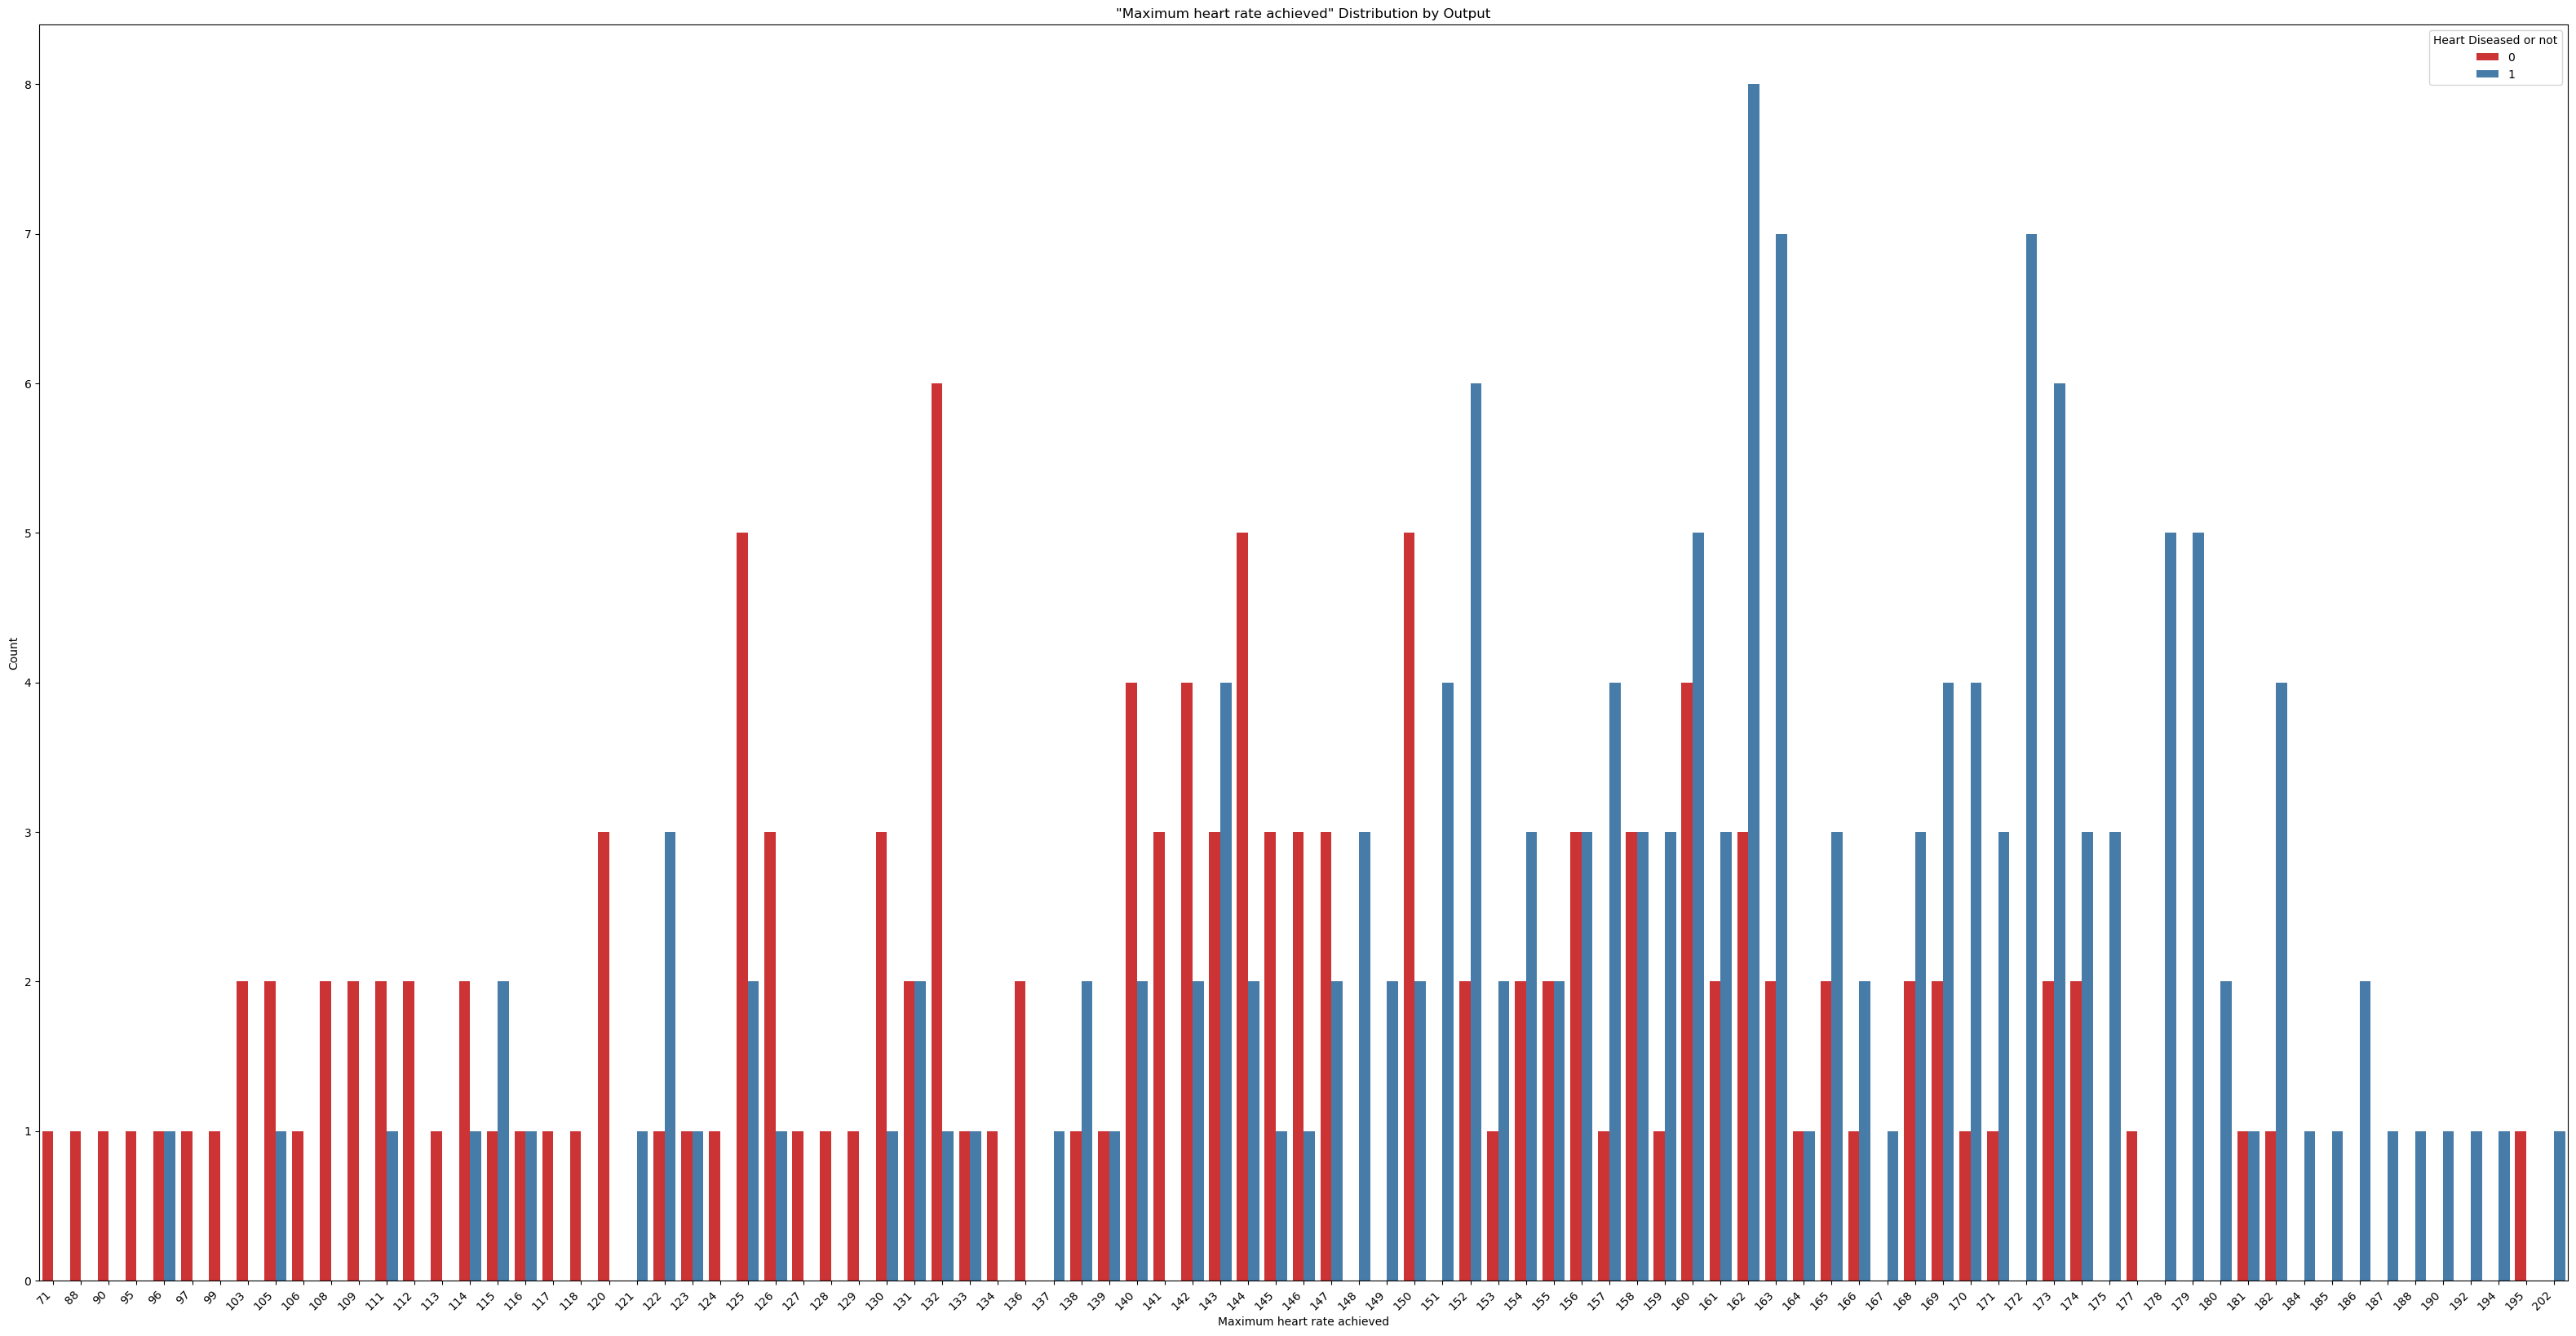

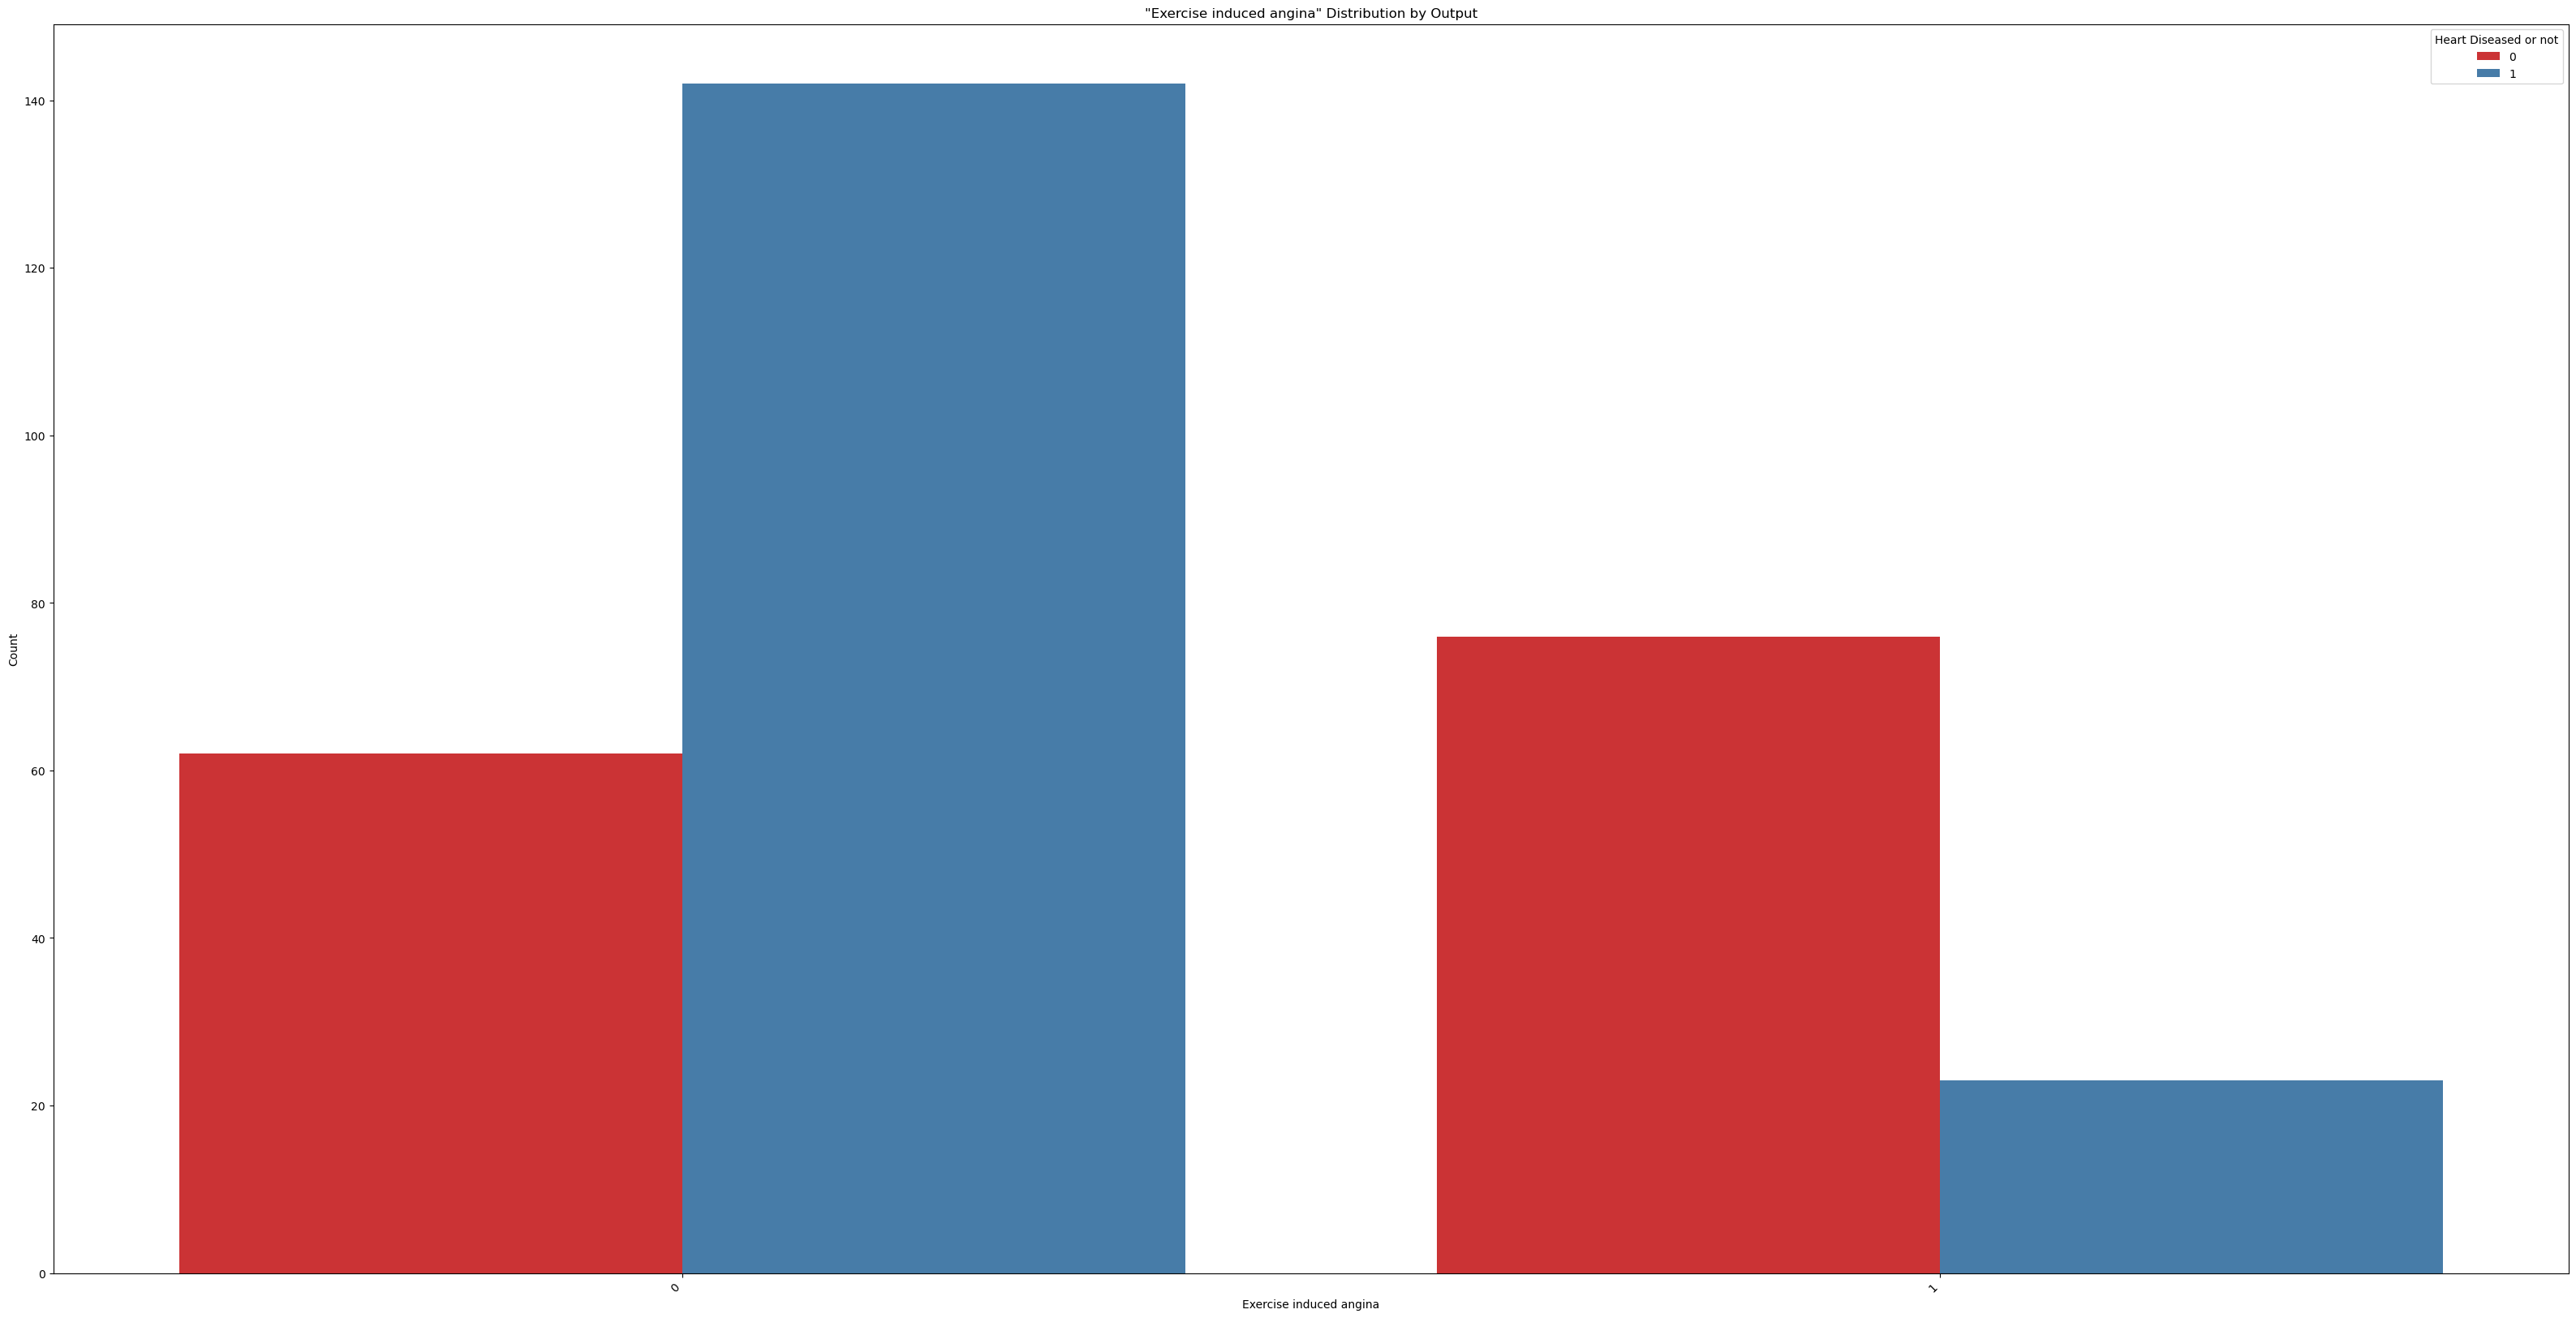

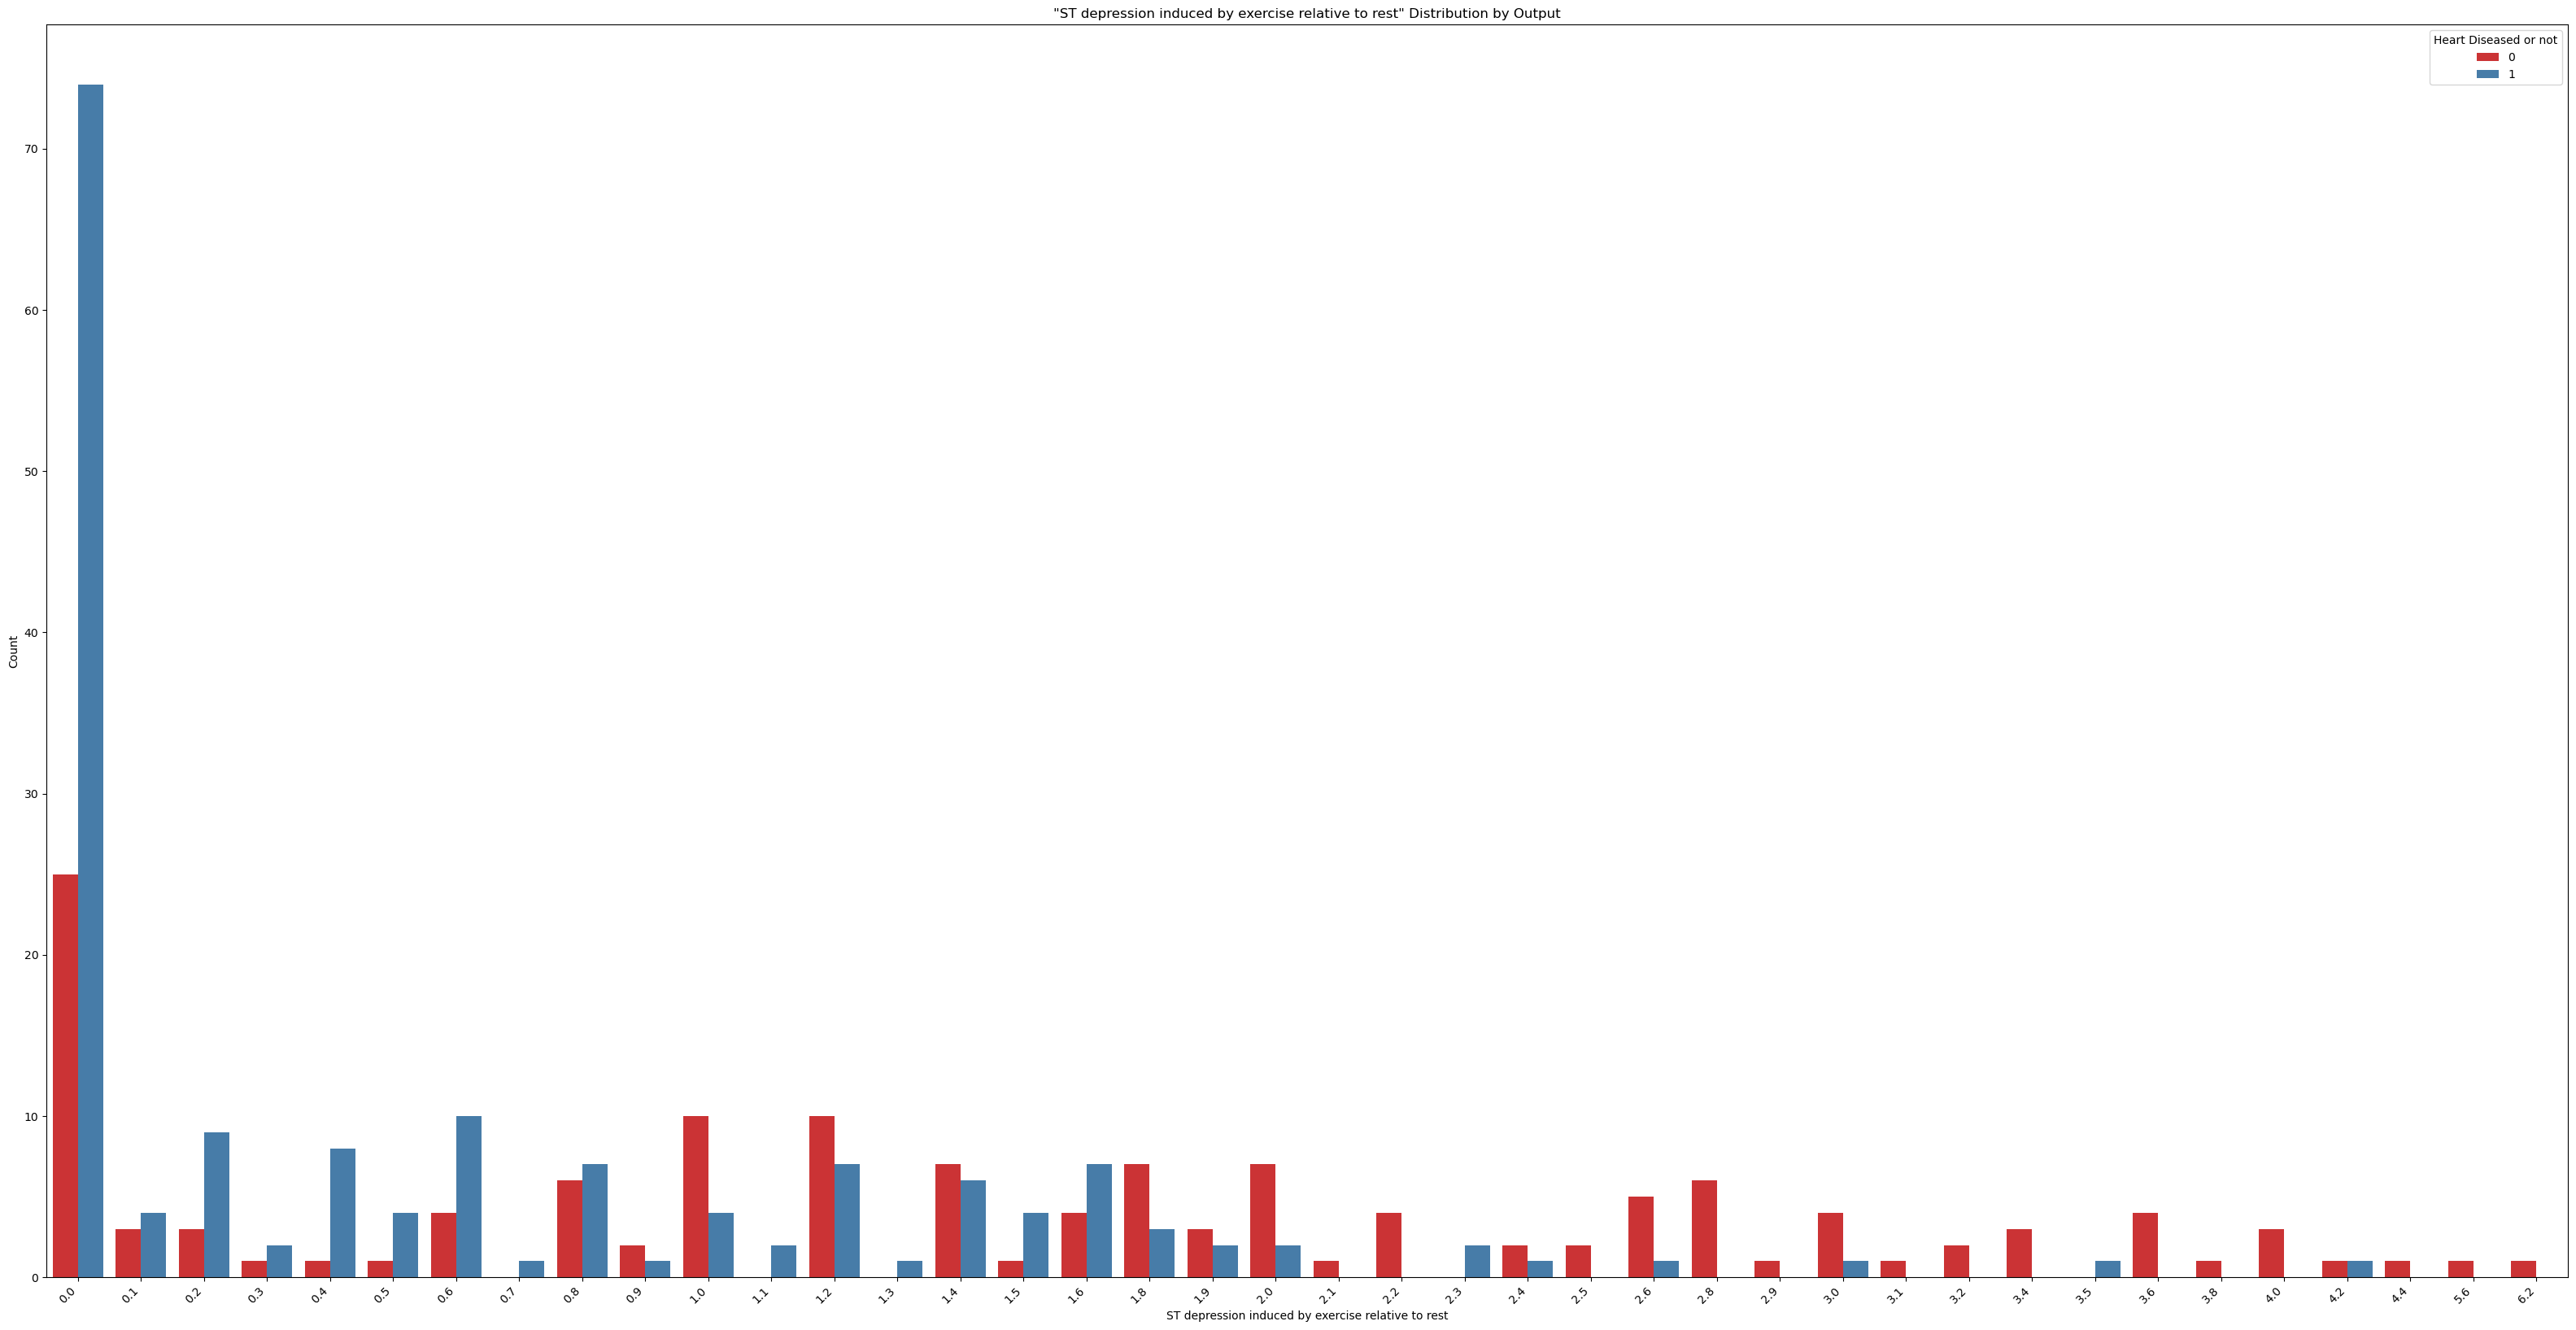

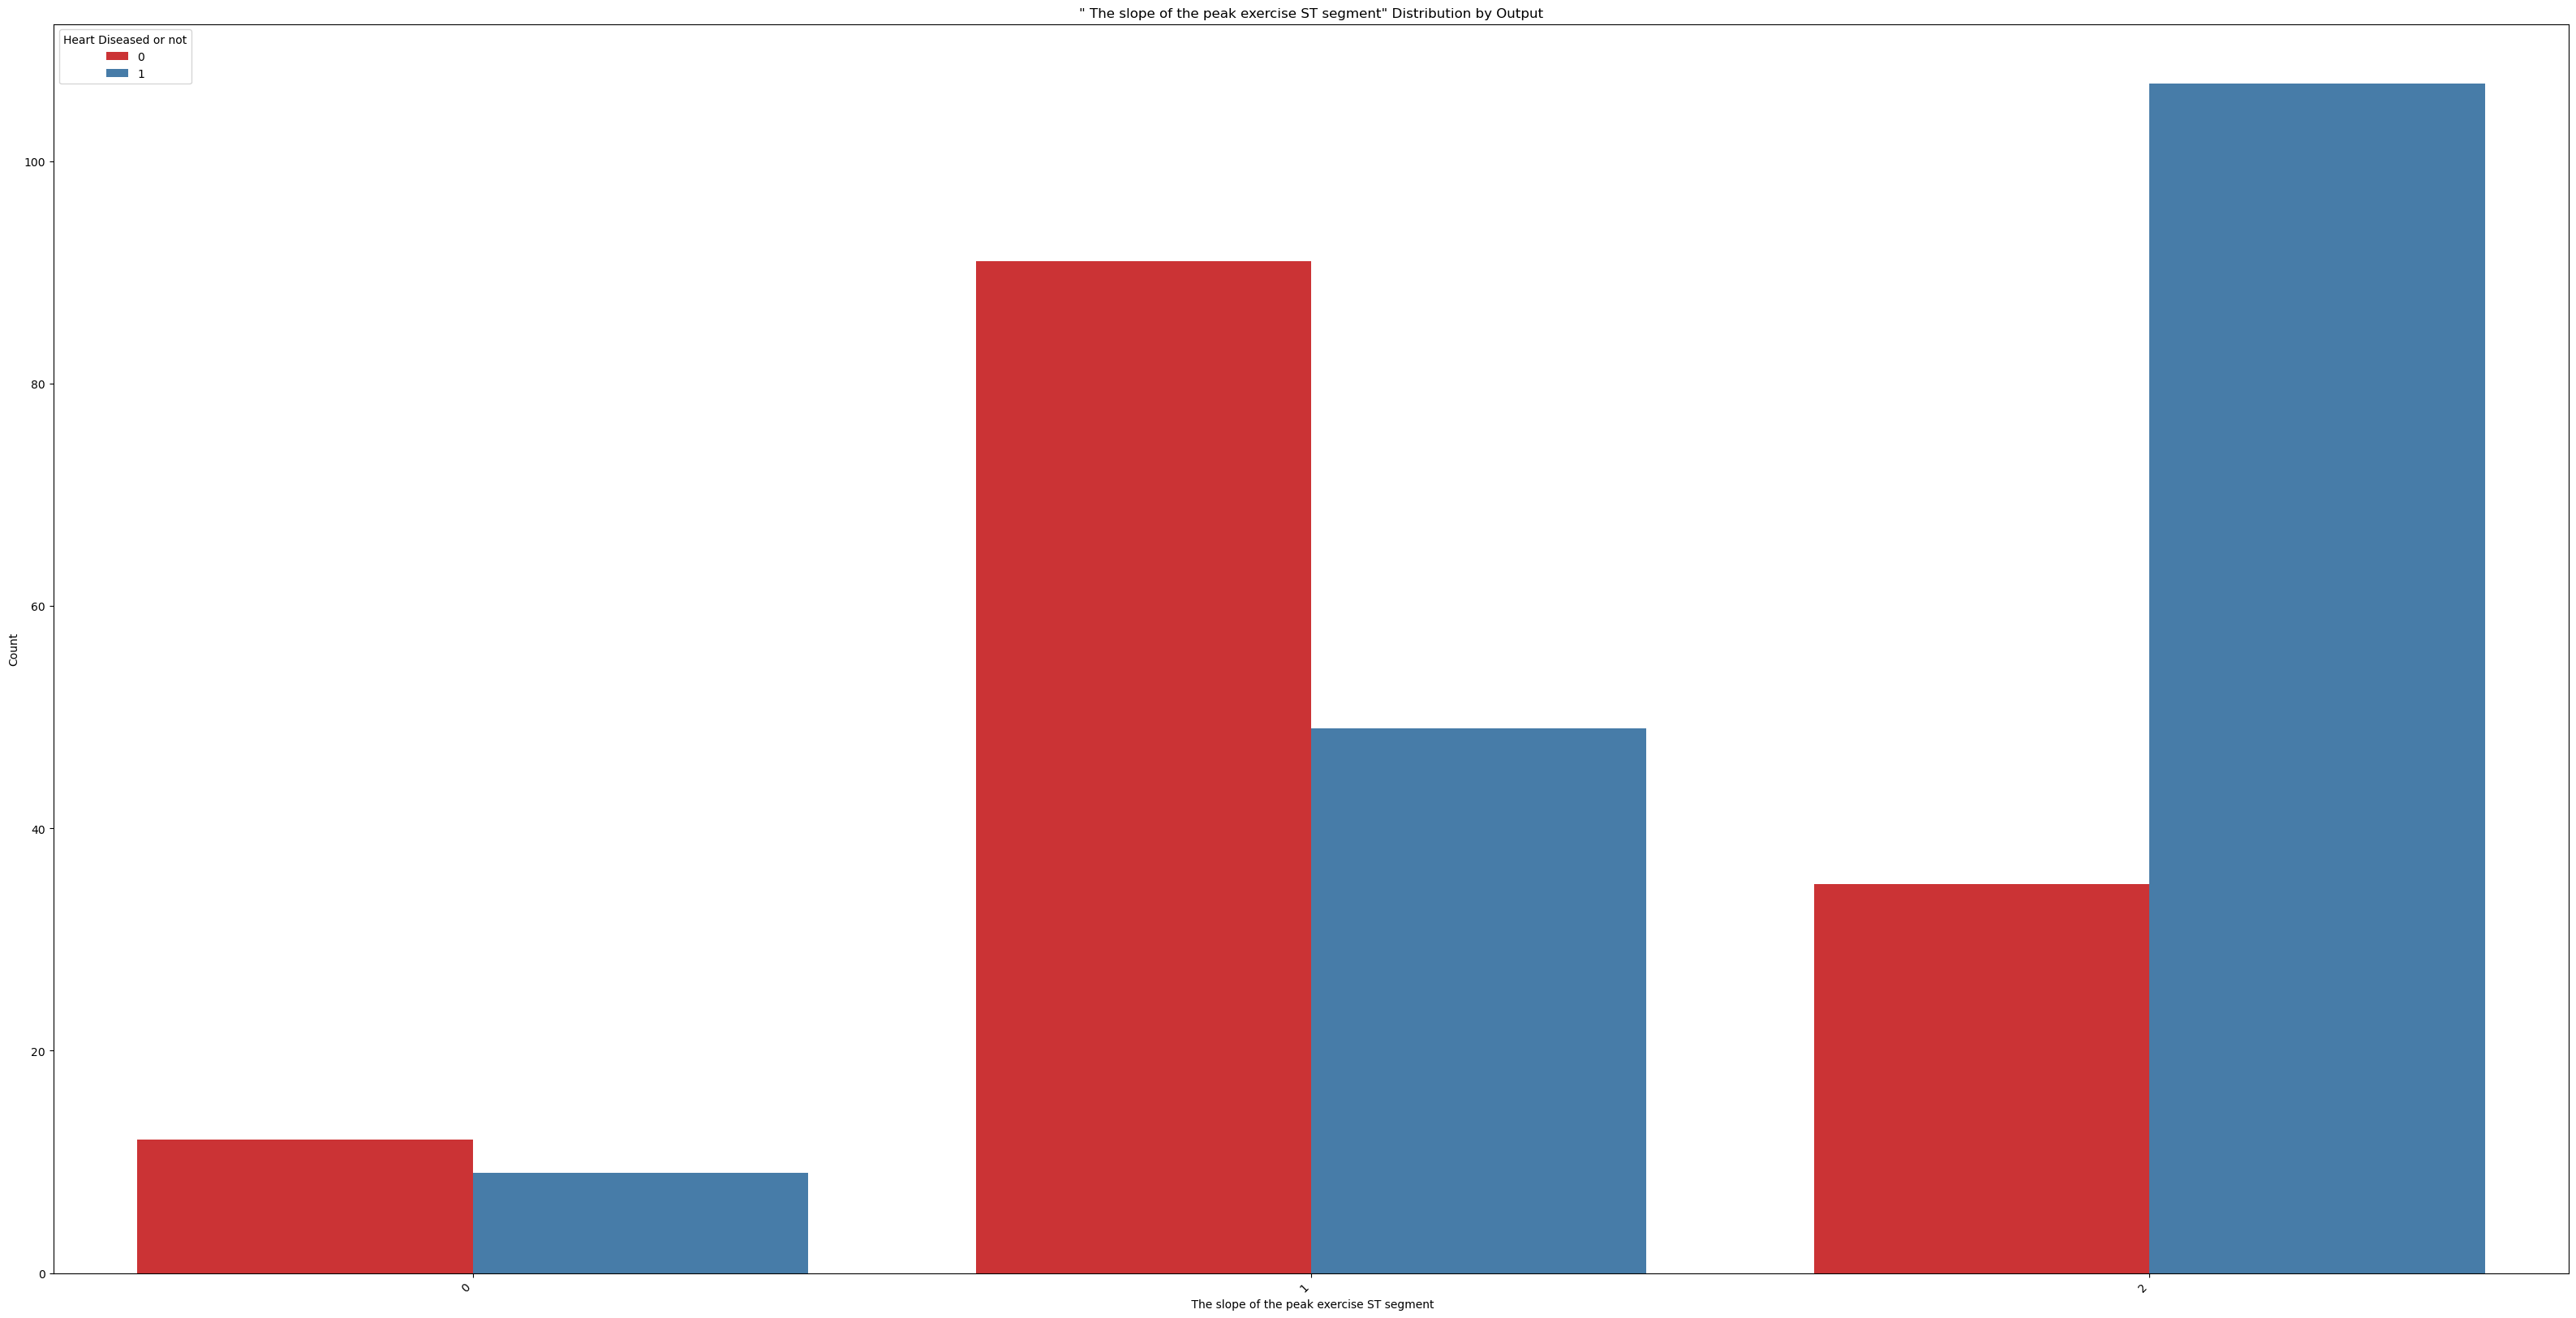

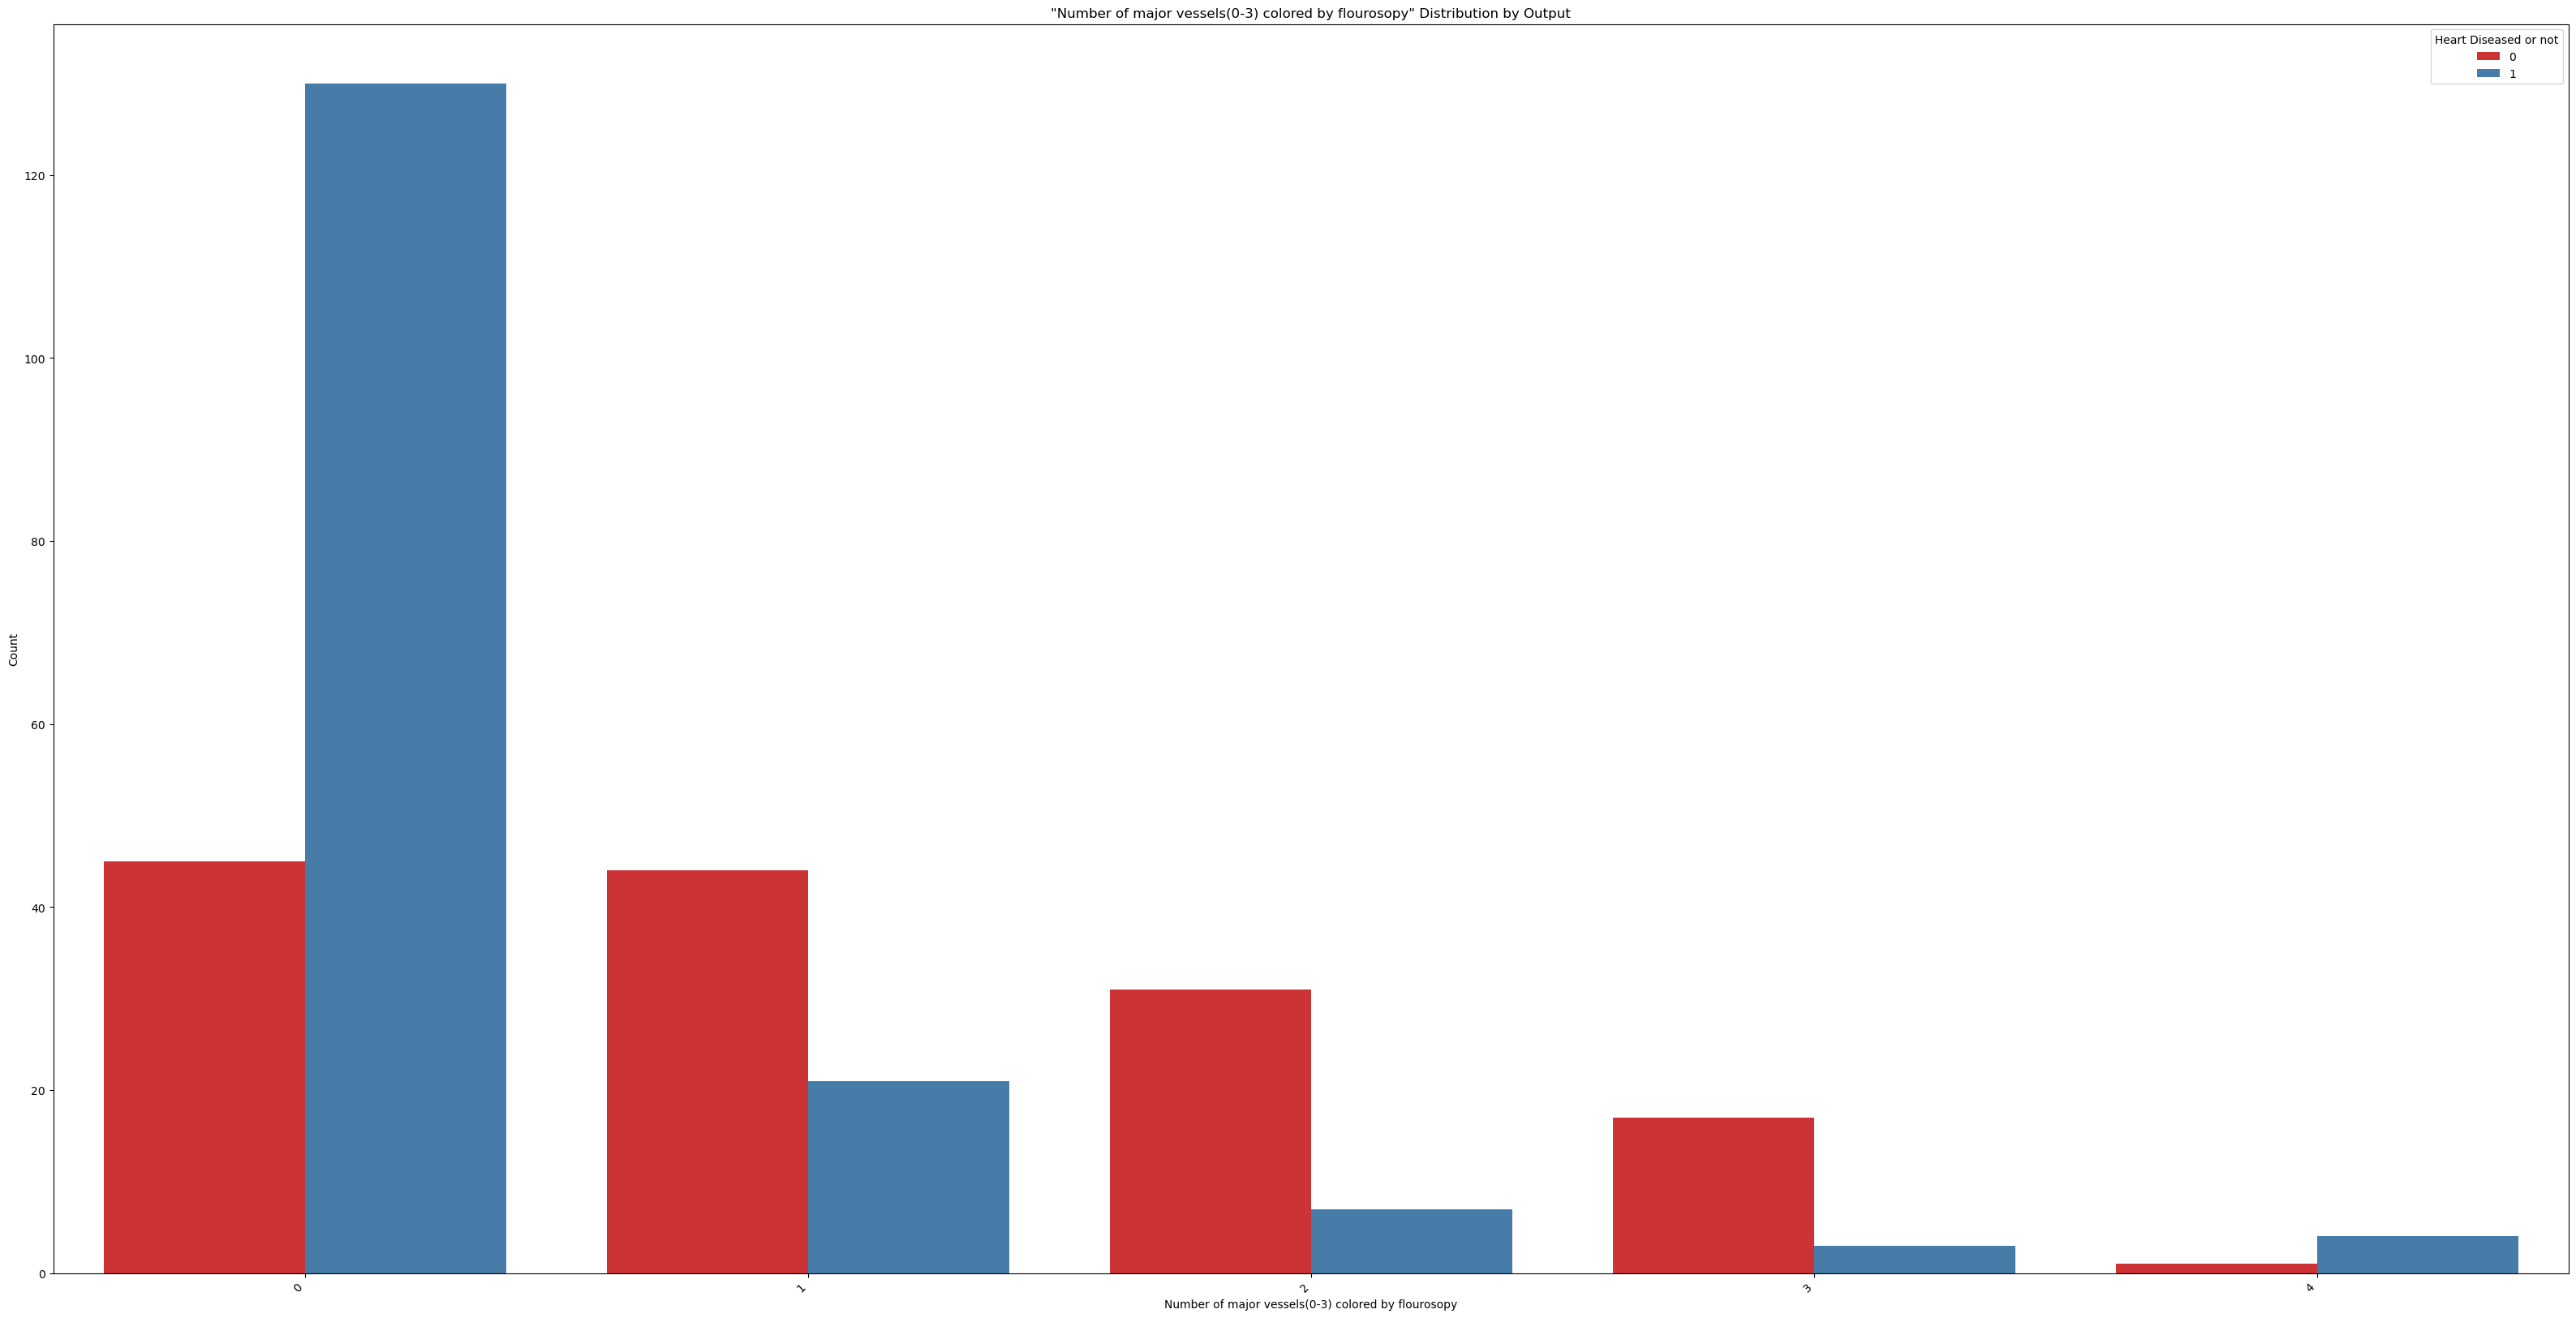

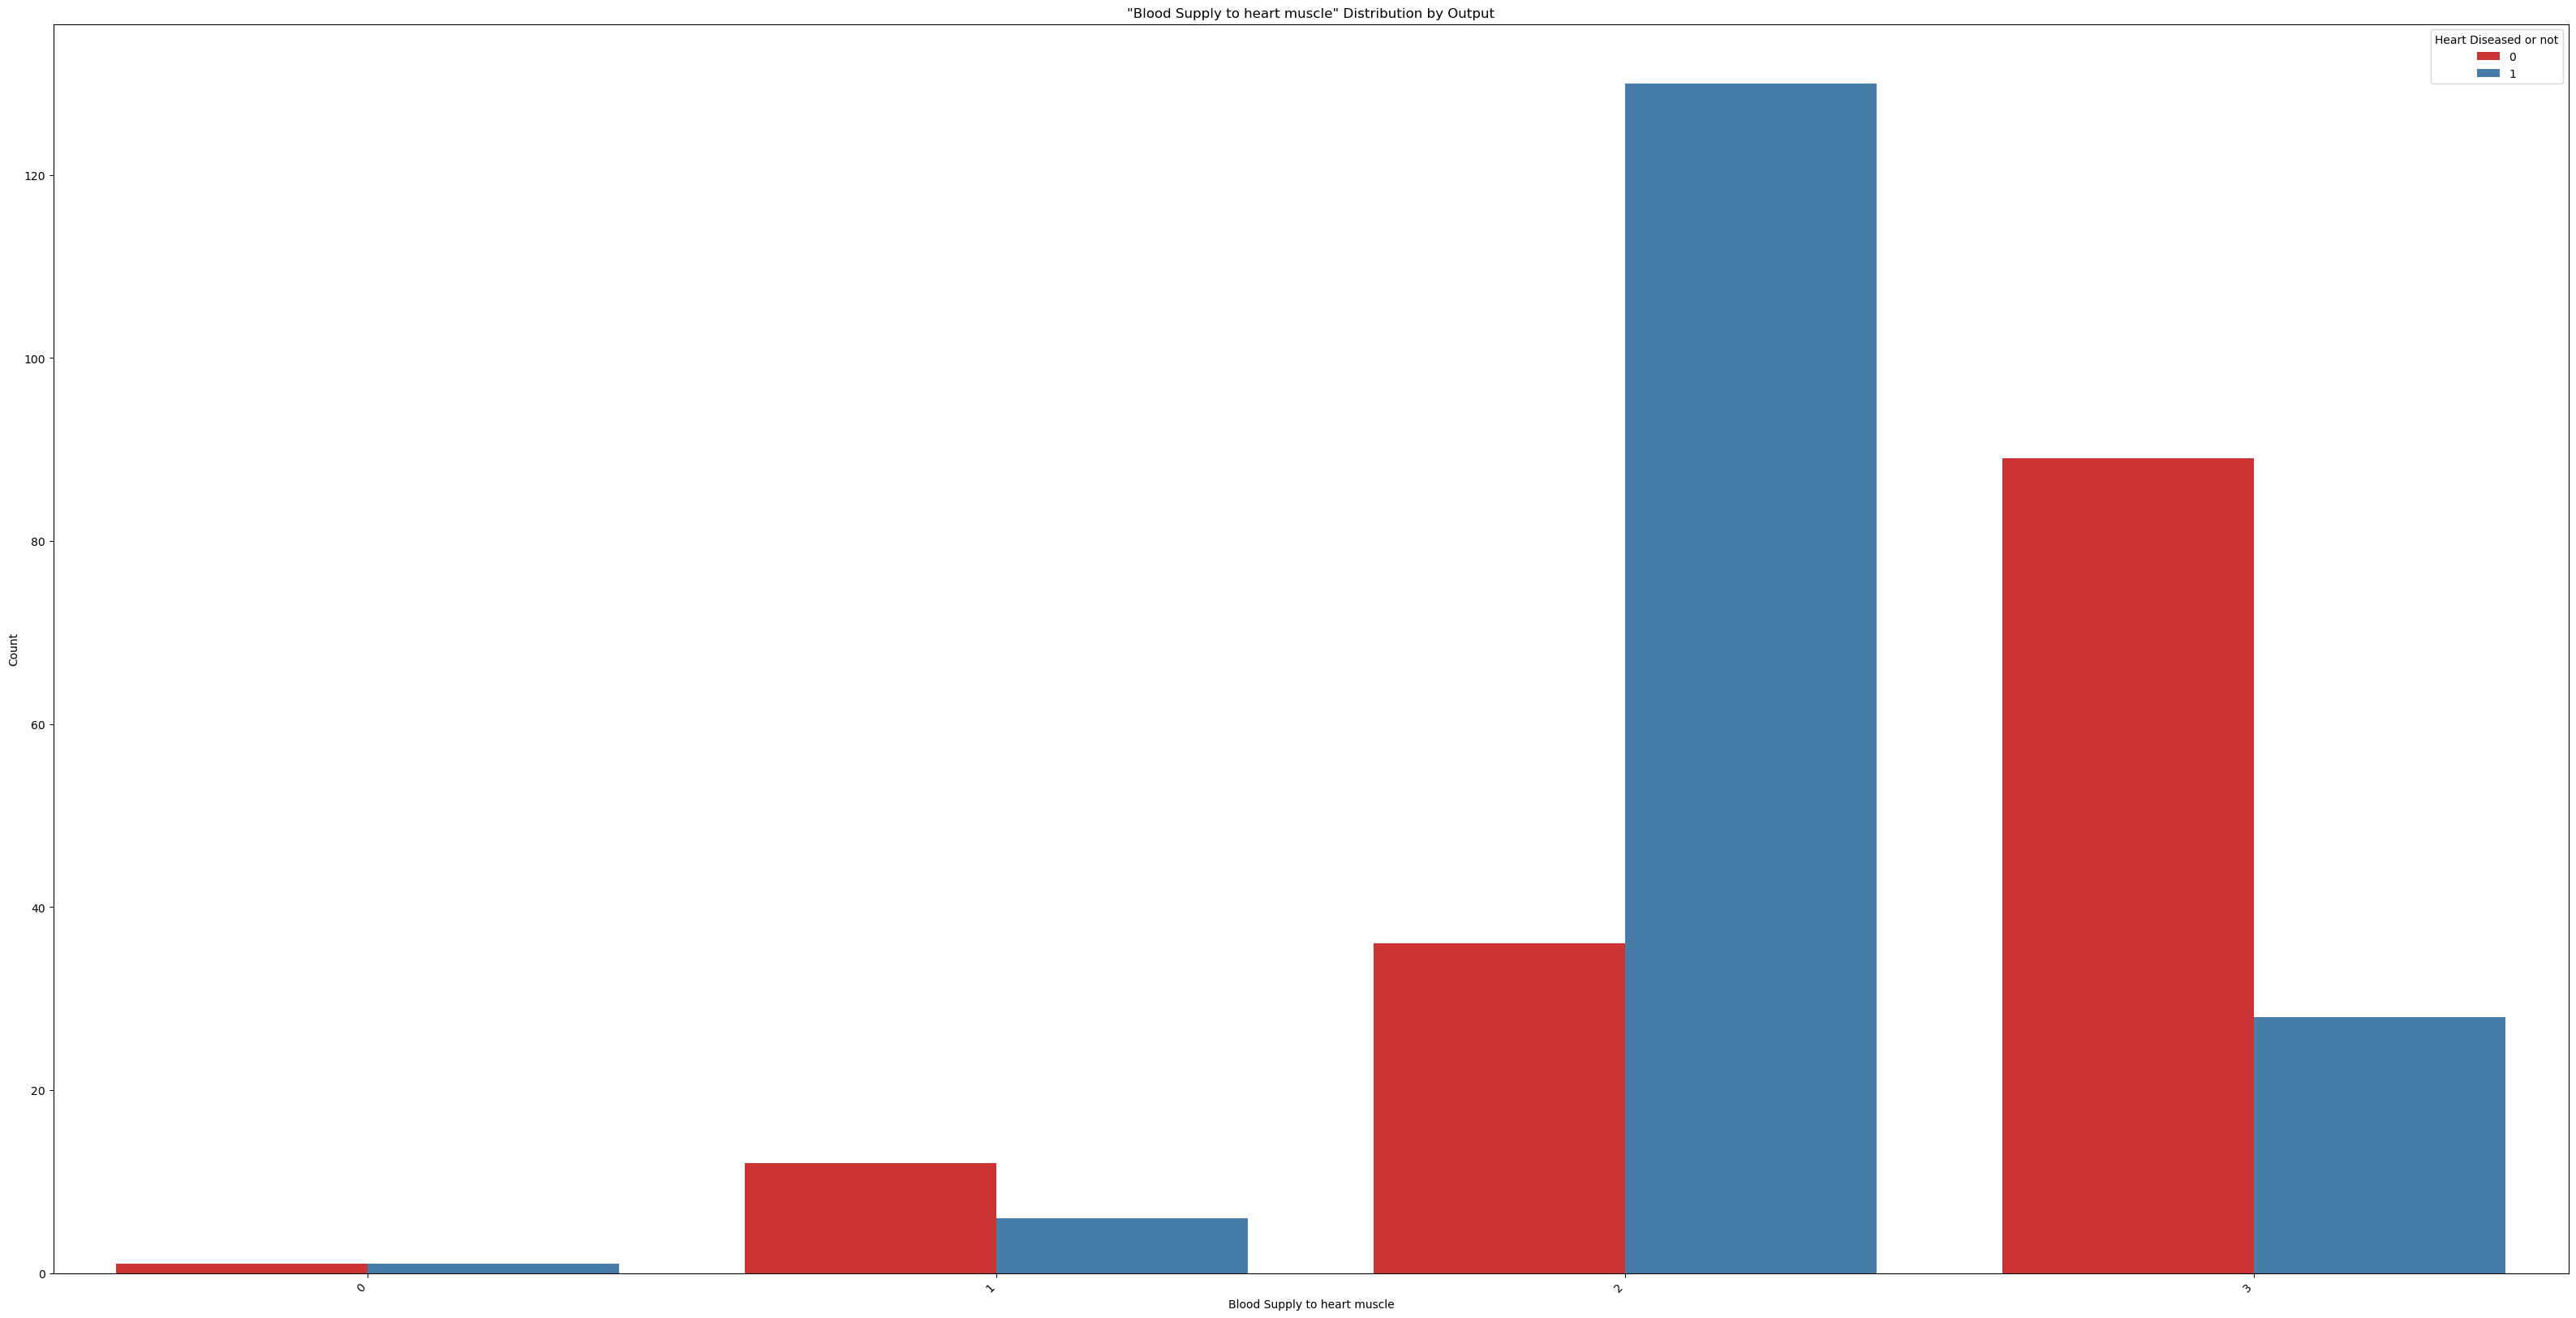

In [122]:
feature_descriptions = {
    'age' : 'Age of persons',
    'sex' : 'Gender of persons',
    'cp' : 'Chest pain types',
    'trtbps' : 'Resting blood pressure',
    'chol' : 'Serum cholestrol in mg/dl',
    'fbs' : 'Fasting blood sugar > 120 mg/dl',
    'restecg' : 'Resting electrocardio results(values 0,1,2)',
    'thalachh' : 'Maximum heart rate achieved',
    'exng' : 'Exercise induced angina',
    'oldpeak' : 'ST depression induced by exercise relative to rest',
    'slp' :' The slope of the peak exercise ST segment',
    'caa' : 'Number of major vessels(0-3) colored by flourosopy',
    'thall' : 'Blood Supply to heart muscle',
    'output' : 'Output column, 1 = Diseased, 0 = Not Diseased'
}
# Show Data Distribution
for feature in numerical_features:
    plt.figure(figsize=(40, 20))
    sns.countplot(data=new_df, x=feature, hue=new_df['output'], palette='Set1')
    plt.title(f'"{feature_descriptions[feature]}" Distribution by Output')
    plt.xlabel(feature_descriptions[feature])
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Heart Diseased or not')
    plt.show()


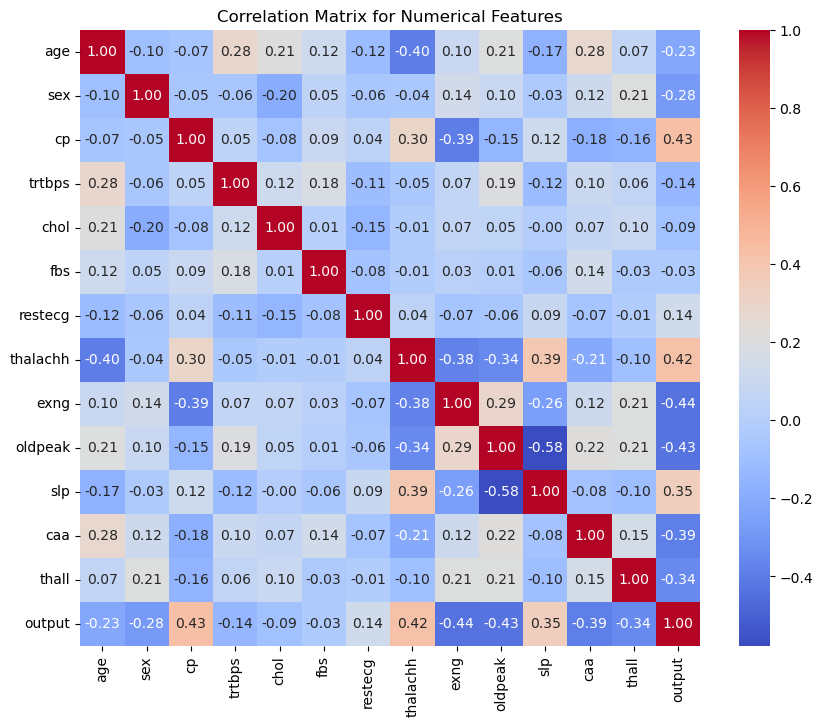

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [128]:
# Calculate correlations
correlation_matrix = new_df.corr()
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()

correlation_matrix

## Data Analysis ##

1. Dataset is pretty balanced
    - The Output variable is highly balanced:
        - 0: 45.54%
        - 1: 54.45%
2. There is a strong correlation between  ST depression induced by exercise relative to rest &n he slope of the peak exercise ST segment. Also, Maximum heart rate achieved & Exercise induced angina.
3.  Cholestrol is negatively corelated with Heart Disease. Heart Disease is negatively correlated with Age as well.